## MRP GDPR

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.decomposition import PCA
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
nlp = spacy.load("en_core_web_sm")
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import FactorAnalysis
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
import regex
import re
import gensim
import umap
import yake

In [2]:
#data_text = pd.read_excel("data_thanasis.xlsx")
#data_region = pd.read_excel("data_vassilis.xlsx")

In [3]:
#vasids = data_region['V1']
#thanids = data_text['V1']
#texts = []
#for id1 in vasids:
 #   for i,id2 in enumerate(thanids):
  #      if id1 == id2:
   #         texts.append(np.array(data_text['V9'])[i])
    #        break

In [4]:
#data = data_region
#data['Summary'] = texts

In [228]:
data = pd.read_excel("data_combined.xlsx")

In [6]:
#data.to_excel("data_combined.xlsx")

In [7]:
reports = data['Summary']

In [8]:
reports = list(reports)

In [9]:
stopwords = ["0o","datatilsynet","naih","norwegian","italian", "eur","0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"]

In [10]:
def preprocess(doc):
    for punct in string.punctuation:
        doc = doc.replace(punct,' ')
    #Lemmatize
    doc_spacy = nlp(doc)
    empty_list = []
    for token in doc_spacy:
        if token.text != "data":
            empty_list.append(token.lemma_)
        else:
            empty_list.append("data")
    doc = " ".join(empty_list)
    #Tokenize
    tokens = doc.split()
    tokens_no_punctuation = [token.lower() for token in tokens if token not in string.punctuation]
    tokens_after_preprocess = []
    for word in tokens_no_punctuation:
        try:
            float(word)
        except:
            if word in stopwords:
                pass
            else:
                tokens_after_preprocess.append(word)
    
    return " ".join(tokens_after_preprocess)

In [11]:
reports_preprocessed = [preprocess(rep) for rep in reports]

In [12]:
vec = TfidfVectorizer(smooth_idf=True)
mat = vec.fit_transform(reports_preprocessed)

In [13]:
mat.todense().shape

(86, 941)

# Article Parsing

In [14]:
articles = data['V8']

In [15]:
articles[1]

'Art. 32 (1) b), d) GDPR'

In [16]:
class Article():
    article = None
    section = None
    part = None
    
    def __init__(self,art,sec,prt):
        self.article = art
        self.section = sec
        self.part = prt
    
    def __repr__(self):
        ret_string = "Art. " + str(self.article)
        if self.section != None:
            ret_string += " (" + str(self.section) + ") "
        if self.part == None:
            return ret_string
        for p in self.part:
            ret_string += p + ") "
        return ret_string

def parse_articles(doc):
    articles = list()
    tokens = doc.split()
    a = None
    s = None
    p = list()
    artstarted = False
    for tok in tokens:
        #print(tok,a,s,p)
        if artstarted:
            if tok.lower().replace(",","") in ["gpdr","gdpr"]:
                artstarted = False
                articles.append(Article(a,s,p))
                a = None
                s = None
                p = list()
            else:
                try:#article number
                    int(tok)
                    if a != None:
                        articles.append(Article(a,s,p))
                    a = int(tok)
                except:
                    try:#section number
                        int(tok.replace("(","").replace(")","").replace(",",""))
                        if s != None:
                            articles.append(Article(a,s,p))
                            p = list()
                        s = int(tok.replace("(","").replace(")","").replace(",",""))
                        #print("section " + str(s))
                    except:#part description
                        p.append(tok.replace(")","").replace(",",""))
                    
        if tok.lower().replace(".","") == "art":
            artstarted = True
    return articles
        
    
    
    
    

In [17]:
arts = parse_articles("Art. 5 (2) b), (3) gdpr")

In [18]:
arts

[Art. 5 (2) b) , Art. 5 (3) ]

### TFIDF

In [19]:
vec = TfidfVectorizer(smooth_idf=True)
mat = vec.fit_transform(reports_preprocessed)
inv_map = {v: k for k, v in vec.vocabulary_.items()}
colnames = [inv_map[i] for i in range(941)]
df = pd.DataFrame(np.array(mat.todense()))
df.columns = colnames
df

ability  abruzzo  absence  academic    access  accessible  accident  \
0       0.0      0.0      0.0       0.0  0.000000    0.145718  0.000000   
1       0.0      0.0      0.0       0.0  0.047979    0.000000  0.000000   
2       0.0      0.0      0.0       0.0  0.036244    0.113553  0.000000   
3       0.0      0.0      0.0       0.0  0.000000    0.000000  0.000000   
4       0.0      0.0      0.0       0.0  0.000000    0.000000  0.000000   
..      ...      ...      ...       ...       ...         ...       ...   
81      0.0      0.0      0.0       0.0  0.000000    0.000000  0.000000   
82      0.0      0.0      0.0       0.0  0.000000    0.000000  0.000000   
83      0.0      0.0      0.0       0.0  0.000000    0.000000  0.281984   
84      0.0      0.0      0.0       0.0  0.000000    0.000000  0.000000   
85      0.0      0.0      0.0       0.0  0.000000    0.000000  0.000000   

    accidentally  accord  account  ...     woman  work    worker  write  \
0            0.0     0.0      0.0  ...  0.000000   0.0  0.000000    0.0   
1            0.0     0.0      0.0  ...  0.203817   0.0  0.093251    0.0   
2            0.0     0.0      0.0  ...  0.000000   0.0  0.000000    0.0   
3            0.0     0.0      0.0  ...  0.000000   0.0  0.000000    0.0   
4            0.0     0.0      0.0  ...  0.000000   0.0  0.000000    0.0   
..           ...     ...      ...  ...       ...   ...       ...    ...   
81           0.0     0.0      0.0  ...  0.000000   0.0  0.000000    0.0   
82           0.0     0.0      0.0  ...  0.000000   0.0  0.000000    0.0   
83           0.0     0.0      0.0  ...  0.000000   0.0  0.129014    0.0   
84           0.0     0.0      0.0  ...  0.000000   0.0  0.000000    0.0   
85           0.0     0.0      0.0  ...  0.000000   0.0  0.000000    0.0   

       wrong  year  youth  ålesund  østfold  østre  
0   0.000000   0.0    0.0      0.0      0.0    0.0  
1   0.093251   0.0    0.0      0.0      0.0    0.0  
2   0.000000   0.0    0.0      0.0      0.0    0.0  
3   0.000000   0.0    0.0      0.0      0.0    0.0  
4   0.000000   0.0    0.0      0.0      0.0    0.0  
..       ...   ...    ...      ...      ...    ...  
81  0.000000   0.0    0.0      0.0      0.0    0.0  
82  0.000000   0.0    0.0      0.0      0.0    0.0  
83  0.000000   0.0    0.0      0.0      0.0    0.0  
84  0.000000   0.0    0.0      0.0      0.0    0.0  
85  0.000000   0.0    0.0      0.0      0.0    0.0  

[86 rows x 941 columns]

In [20]:
tf_idf_df = pd.DataFrame({'idf' : vec.idf_,'word':vec.get_feature_names()})
tf_idf_df.sort_values('idf').head(60)

idf            word
216  1.083881            data
345  1.338774            fine
612  1.405465        personal
271  1.476924             dpa
410  1.882389          impose
112  1.969401          breach
509  2.064711         measure
812  2.170071         subject
369  2.207812            gdpr
838  2.207812       technical
678  2.247032      protection
4    2.247032          access
55   2.287854             art
541  2.287854    municipality
578  2.374866  organizational
302  2.470176          ensure
444  2.521469   investigation
189  2.521469      controller
387  2.521469          health
14   2.521469        addition
761  2.521469        security
293  2.575536        employee
810  2.575536         student
913  2.632695       violation
660  2.632695      processing
335  2.693319            fail
726  2.693319          report
757  2.693319          school
886  2.693319      university
688  2.693319         purpose
659  2.693319         process
767  2.757858       sensitive
744  2.757858            risk
472  2.757858           legal
686  2.826851         publish
344  2.826851            file
737  2.826851          result
595  2.826851          parent
266  2.900959        document
76   2.900959       authority
415  2.900959         include
409  2.900959       implement
136  2.900959           child
414  2.900959        incident
765  2.981001            send
17   2.981001        adequate
90   2.981001           basis
677  3.068013         protect
611  3.068013          person
799  3.068013           state
684  3.068013          public
649  3.068013       principle
603  3.163323         patient
708  3.163323          regard
421  3.163323          inform
139  3.163323            city
680  3.163323         provide
8    3.163323          accord
290  3.163323           email
556  3.268684          number

In [21]:
feature_selection = ["personal","municipality",#"protection",#"technical",
                     #"security",
                     #"violation",
                     #"health",
                     "university",#"processing",#"organizational",
                     "student","employee",#"authority",
                     #"process",
                     #"risk",
                     "child","sensitive",#"school",
                     "legal","parent",#"implement",
                     #"purpose",
                     #"patient",
                     "public",#"protect",#"inform",
                     #"request"
                    ]

In [22]:
tfidf_selection = df[feature_selection]

In [23]:
tfidf_selection

personal  municipality  university  student  employee     child  \
0   0.174547      0.000000    0.000000      0.0  0.000000  0.120092   
1   0.060019      0.341954    0.000000      0.0  0.000000  0.000000   
2   0.045339      0.000000    0.000000      0.0  0.000000  0.000000   
3   0.130280      0.000000    0.249658      0.0  0.000000  0.000000   
4   0.000000      0.000000    0.000000      0.0  0.000000  0.000000   
..       ...           ...         ...      ...       ...       ...   
81  0.074774      0.000000    0.000000      0.0  0.068512  0.000000   
82  0.000000      0.000000    0.000000      0.0  0.151832  0.000000   
83  0.041519      0.000000    0.000000      0.0  0.076084  0.000000   
84  0.060722      0.000000    0.000000      0.0  0.000000  0.000000   
85  0.140174      0.000000    0.000000      0.0  0.000000  0.000000   

    sensitive     legal    parent    public  
0    0.000000  0.000000  0.117024  0.000000  
1    0.000000  0.000000  0.000000  0.000000  
2    0.000000  0.000000  0.000000  0.000000  
3    0.000000  0.000000  0.000000  0.000000  
4    0.000000  0.247479  0.000000  0.000000  
..        ...       ...       ...       ...  
81   0.146724  0.000000  0.000000  0.000000  
82   0.162581  0.162581  0.000000  0.000000  
83   0.000000  0.000000  0.000000  0.090632  
84   0.000000  0.119151  0.000000  0.000000  
85   0.000000  0.000000  0.000000  0.000000  

[86 rows x 10 columns]

# UMAP

In [24]:
from umap import UMAP
reducer = umap.UMAP(n_components=3)
scaled_data = StandardScaler().fit_transform(df)
embedding = reducer.fit_transform(scaled_data)
embedding.shape

(86, 3)

In [25]:
topics = pd.read_csv("top2vectopics.csv")
colordict = {"University":"blue",
             "without_legal_basis":"red",
             "Family_data":"green",
             "Publishing":"orange",
             "Employee_rights_violation":"black",
             "Health_data":"grey",
             "Governmental_fines":"brown"}

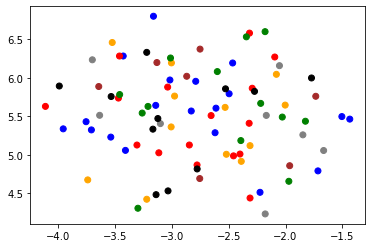

In [26]:
plt.scatter(embedding[:,0],embedding[:,1],c=pd.read_csv("top2vectopics.csv")["0"].map(colordict))

Keywords in top 5 reports according to first UMAP embedding dimension:

In [27]:
embs = embedding[:,1]
top5 = np.argsort(-embs)[:5]
kw_extractor = yake.KeywordExtractor()
top5_reports = " ".join(np.array(reports)[top5])
kw_extractor.extract_keywords(top5_reports)

[('personal data', 0.009417234692881854),
 ('DPA found', 0.012094329884210117),
 ('DPA', 0.012314607155252582),
 ('data', 0.015720803353434204),
 ('Bocconi University', 0.022556730571525255),
 ('Italian DPA', 0.02872970193572065),
 ('personal', 0.034514133164842795),
 ('exams', 0.03701149276701082),
 ('DPA found violations', 0.03851979136629005),
 ('GDPR', 0.04438946160864889),
 ('Respondus', 0.05180774934574432),
 ('exam', 0.051816089873815155),
 ('University', 0.05358845780254021),
 ('Ospedaliera Universitaria Careggi', 0.056134875372994636),
 ('students', 0.056501442583891975),
 ('American company Respondus', 0.062498102193773775),
 ('found', 0.06431313696405443),
 ('transferred personal data', 0.067115065454664),
 ('Bocconi', 0.06860665278525618),
 ('Azienda Ospedaliera Universitaria', 0.07533168459483339)]

--> Not really clear what "factors" mean

## PCA/FA

FA function:

In [28]:
def factor_analysis(data,n_comps):
    methods = [
        ("PCA", PCA()),
        ("Unrotated FA", FactorAnalysis()),
        ("Varimax FA", FactorAnalysis(rotation="varimax")),
    ]
    fig, axes = plt.subplots(ncols=len(methods), figsize=(10, 8))

    for ax, (method, fa) in zip(axes, methods):
        fa.set_params(n_components=n_comps)
        fa.fit(data)

        components = fa.components_.T
        print("\n\n %s :\n" % method)
        print(components)

        vmax = np.abs(components).max()
        ax.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax)
        ax.set_yticks(np.arange(len(data.columns)))
        ax.set_yticklabels(data.columns)
        ax.set_title(str(method))
        ax.set_xticks([0, 1,2,3])
        ax.set_xticklabels(["1", "2","3","4"])
    fig.suptitle("Factors")
    plt.tight_layout()
    plt.show()
    return fa

In [29]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(tfidf_selection)
kmo_model

D:\Anaconda\lib\site-packages\factor_analyzer\utils.py:249: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


0.62016971920675

In [30]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(tfidf_selection)
chi_square_value, p_value

(117.93189711922471, 1.8754114867890042e-08)



 PCA :

[[-0.13141152  0.05543657 -0.17541462]
 [ 0.83586037  0.291118   -0.4416988 ]
 [-0.30418559  0.3815388  -0.16559421]
 [-0.10236219  0.6889855   0.20075894]
 [ 0.05823619 -0.16415442 -0.19881325]
 [ 0.13103856  0.03281053  0.18538595]
 [-0.01257563 -0.10600727 -0.12838056]
 [-0.17520939  0.2784966  -0.1678528 ]
 [ 0.30340049  0.23288624  0.70324399]
 [-0.19388313  0.34763071 -0.30545604]]


 Unrotated FA :

[[-0.01605517  0.00630072  0.01215321]
 [ 0.03895879 -0.01579923  0.00096749]
 [-0.02322885  0.03366047  0.01677131]
 [ 0.00272837  0.03996096  0.01323181]
 [-0.00909042 -0.03090239  0.01611497]
 [ 0.02693938 -0.00235744  0.00925765]
 [-0.01144064 -0.02548236  0.02428233]
 [-0.01854099  0.0269974   0.02561662]
 [ 0.06962531  0.00991397  0.01901321]
 [-0.02001582  0.03370648  0.02283795]]


 Varimax FA :

[[-0.01055147  0.01669515  0.00742336]
 [ 0.03497938 -0.02281219  0.00493826]
 [-0.01237494  0.04203013 -0.0058491 ]
 [ 0.0117886   0.03693252 -0.0166259 ]
 [-0.00752575 -0

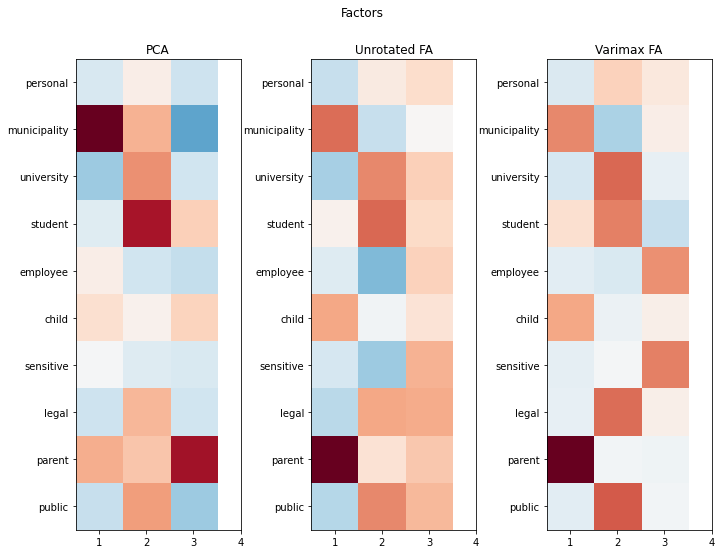

In [31]:
fa = factor_analysis(tfidf_selection,3)

In [32]:
scores = np.matmul(fa.components_,tfidf_selection.T)

In [33]:
scores = StandardScaler().fit_transform(scores.T)

In [34]:
scores = scores.T

In [35]:
fa_scores = pd.DataFrame(scores.T,columns=["Family","University/Student","Sensitive/Personal/Employee"])

In [36]:
import plotly.express as px

df = df

features = df

fig_3d = px.scatter_3d(
    fa_scores, x='Family', y='University/Student', z='Sensitive/Personal/Employee',
    color=topics["0"],
    text=range(86)
)
fig_3d.update_layout(scene = dict(
                    xaxis_title='Family',
                    yaxis_title='University/Student',
                    zaxis_title='Sensitive/Personal/Employee'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10),
                    legend_title_text='Topic')
fig_3d.update_traces(marker_size=5)
fig_3d.write_html("factor_analysis_top2vec_3d.html")
fig_3d.show()

In [37]:
fa_scores.columns = ["Family","University_Student","Sensitive_Personal_Employee"]

## BERTopic

In [38]:
from bertopic import BERTopic
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(reports)
topic_model.get_topic_info()

Topic  Count                      Name
0     -1     34         -1_the_of_to_data
1      0     20  0_the_of_municipality_to
2      1     19         1_the_of_dpa_data
3      2     13    2_the_of_data_director

In [39]:
topic_model.get_topics()

{-1: [('the', 0.11656794790087029),
  ('of', 0.09088488855957673),
  ('to', 0.08714129793349747),
  ('data', 0.07667228373692873),
  ('in', 0.06044364505173511),
  ('and', 0.05580696439861101),
  ('for', 0.04463932426484954),
  ('that', 0.040809114348350904),
  ('was', 0.03930729406007264),
  ('personal', 0.03926093848806068)],
 0: [('the', 0.12970445167524103),
  ('of', 0.07991702962660635),
  ('municipality', 0.061729882688562686),
  ('to', 0.0587367065720352),
  ('dpa', 0.055611003637552205),
  ('and', 0.05186045596006382),
  ('data', 0.04839638927602726),
  ('in', 0.048145066163860724),
  ('for', 0.045895597525503096),
  ('had', 0.045298917788807576)],
 1: [('the', 0.14641981793631972),
  ('of', 0.08921019369960216),
  ('dpa', 0.06694657991858803),
  ('data', 0.06581375932189834),
  ('had', 0.06271238666541634),
  ('to', 0.06031097293522982),
  ('and', 0.05753494136087581),
  ('that', 0.05004961138358368),
  ('eur', 0.04018198032059675),
  ('in', 0.03606325872631102)],
 2: [('the',

## Top2Vec

In [40]:
from top2vec import Top2Vec
model = Top2Vec(reports*10,speed="deep-learn",workers=14,embedding_model_path="paraphrase-MiniLM-L6-v2")

2022-06-22 14:02:26,377 - top2vec - INFO - Pre-processing documents for training
2022-06-22 14:02:26,538 - top2vec - INFO - Creating joint document/word embedding
2022-06-22 14:02:45,366 - top2vec - INFO - Creating lower dimension embedding of documents
2022-06-22 14:02:48,076 - top2vec - INFO - Finding dense areas of documents
2022-06-22 14:02:48,105 - top2vec - INFO - Finding topics


In [41]:
model.doc_top[:86]

array([ 6,  7,  2, 15, 23, 14, 21, 21,  9, 10, 10, 16,  4,  2,  2, 15,  1,
        5, 13,  6,  8,  2, 10,  1,  1,  0,  5,  6,  5,  2,  1,  7,  9, 13,
        0,  0,  4, 22,  3,  3,  5,  0, 19, 12, 24,  9, 17, 18,  4,  7, 14,
       14, 13,  1, 25, 25,  1,  3, 11, 16, 12,  5, 17, 20, 15, 20, 23,  7,
       12,  8, 22, 24, 19, 11,  8,  8,  3,  9,  4,  4,  0,  0, 19, 18,  3,
       11])

In [42]:
model.hierarchical_topic_reduction(num_topics=7)

[[13, 10, 6, 16, 17, 15],
 [8, 20, 18, 22, 0],
 [7, 21, 5],
 [12, 11, 25, 4],
 [9, 24, 23, 14],
 [2, 1],
 [19, 3]]

In [43]:
[tp[:10] for tp in model.topic_words_reduced]

[array(['he', 'his', 'municipal', 'election', 'right', 'violation',
        'director', 'local', 'employee', 'company'], dtype='<U14'),
 array(['technical', 'organizational', 'appropriate', 'measures',
        'accounts', 'level', 'email', 'schools', 'adequate', 'risk'],
       dtype='<U14'),
 array(['patients', 'affected', 'health', 'access', 'hospital', 'patient',
        'app', 'teachers', 'users', 'according'], dtype='<U14'),
 array(['published', 'website', 'file', 'office', 'names', 'datatilsynet',
        'people', 'document', 'containing', 'norwegian'], dtype='<U14'),
 array(['basis', 'respondus', 'properly', 'sufficient', 'legal',
        'processing', 'necessary', 'without', 'exams', 'would'],
       dtype='<U14'),
 array(['owners', 'board', 'surveillance', 'monitor', 'authority',
        'decision', 'if', 'attendance', 'purposes', 'used'], dtype='<U14'),
 array(['ministry', 'course', 'status', 'italian', 'published', 'document',
        'parties', 'some', 'birth', 'contained'

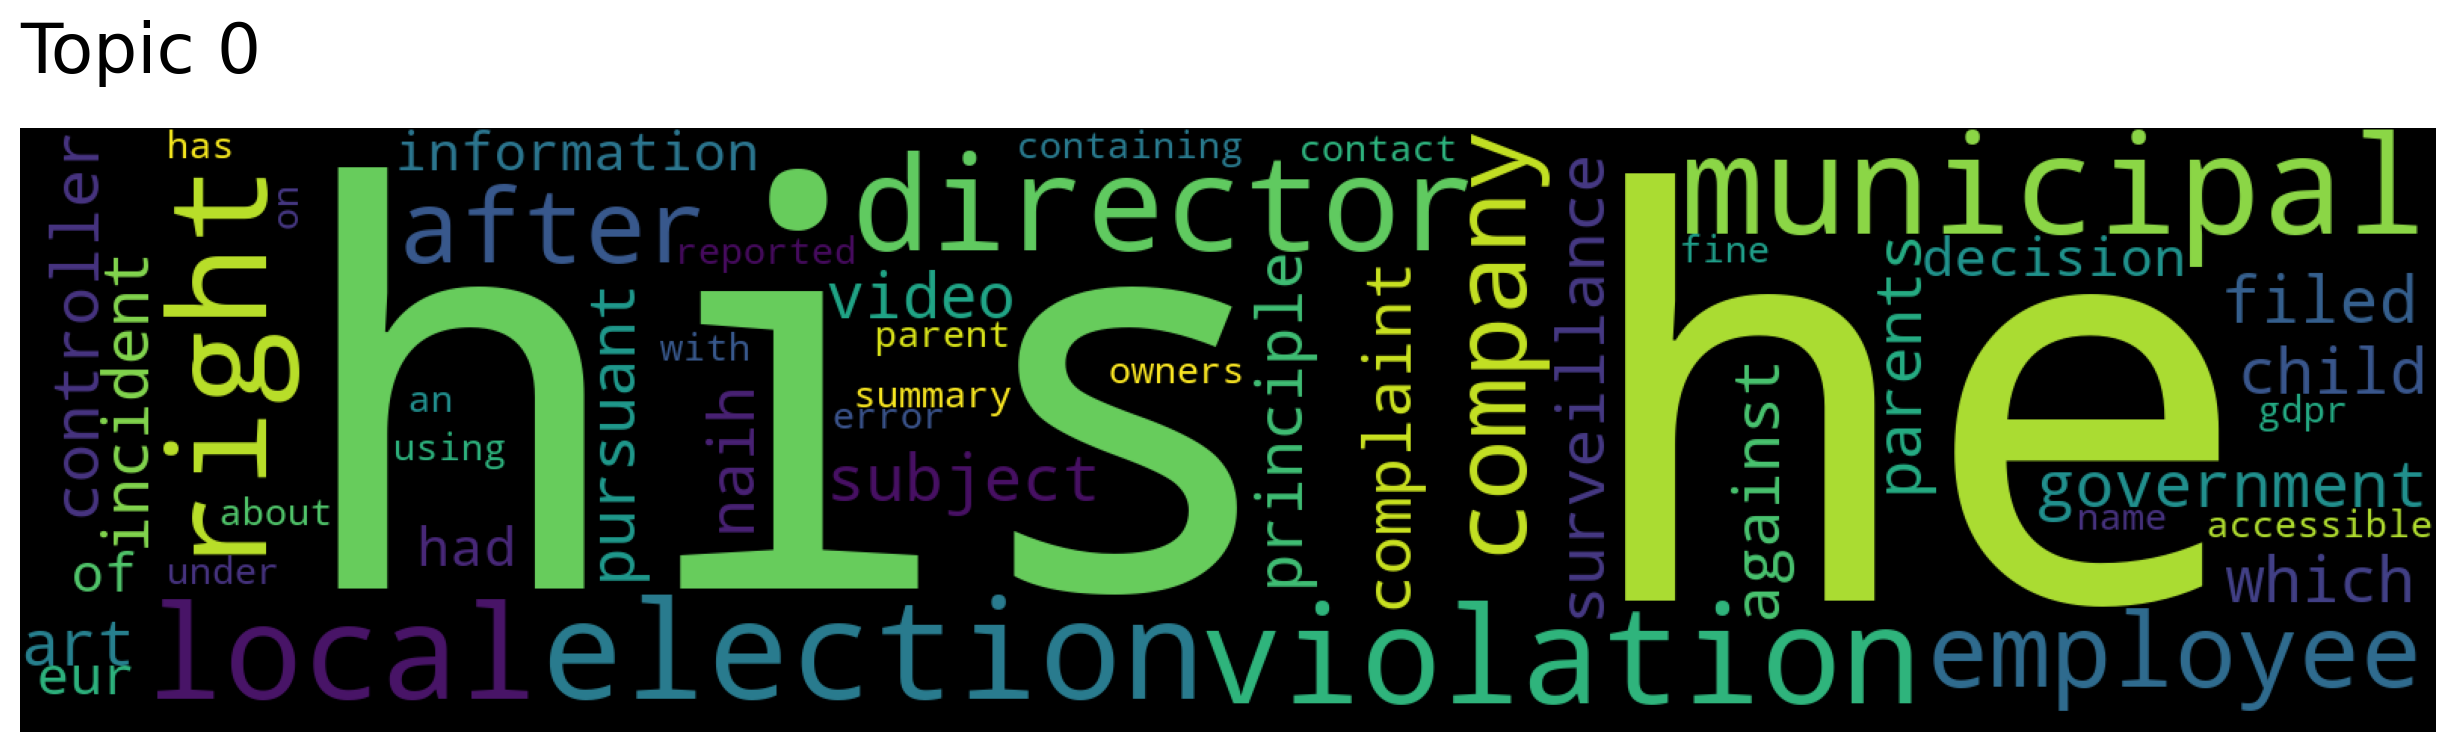

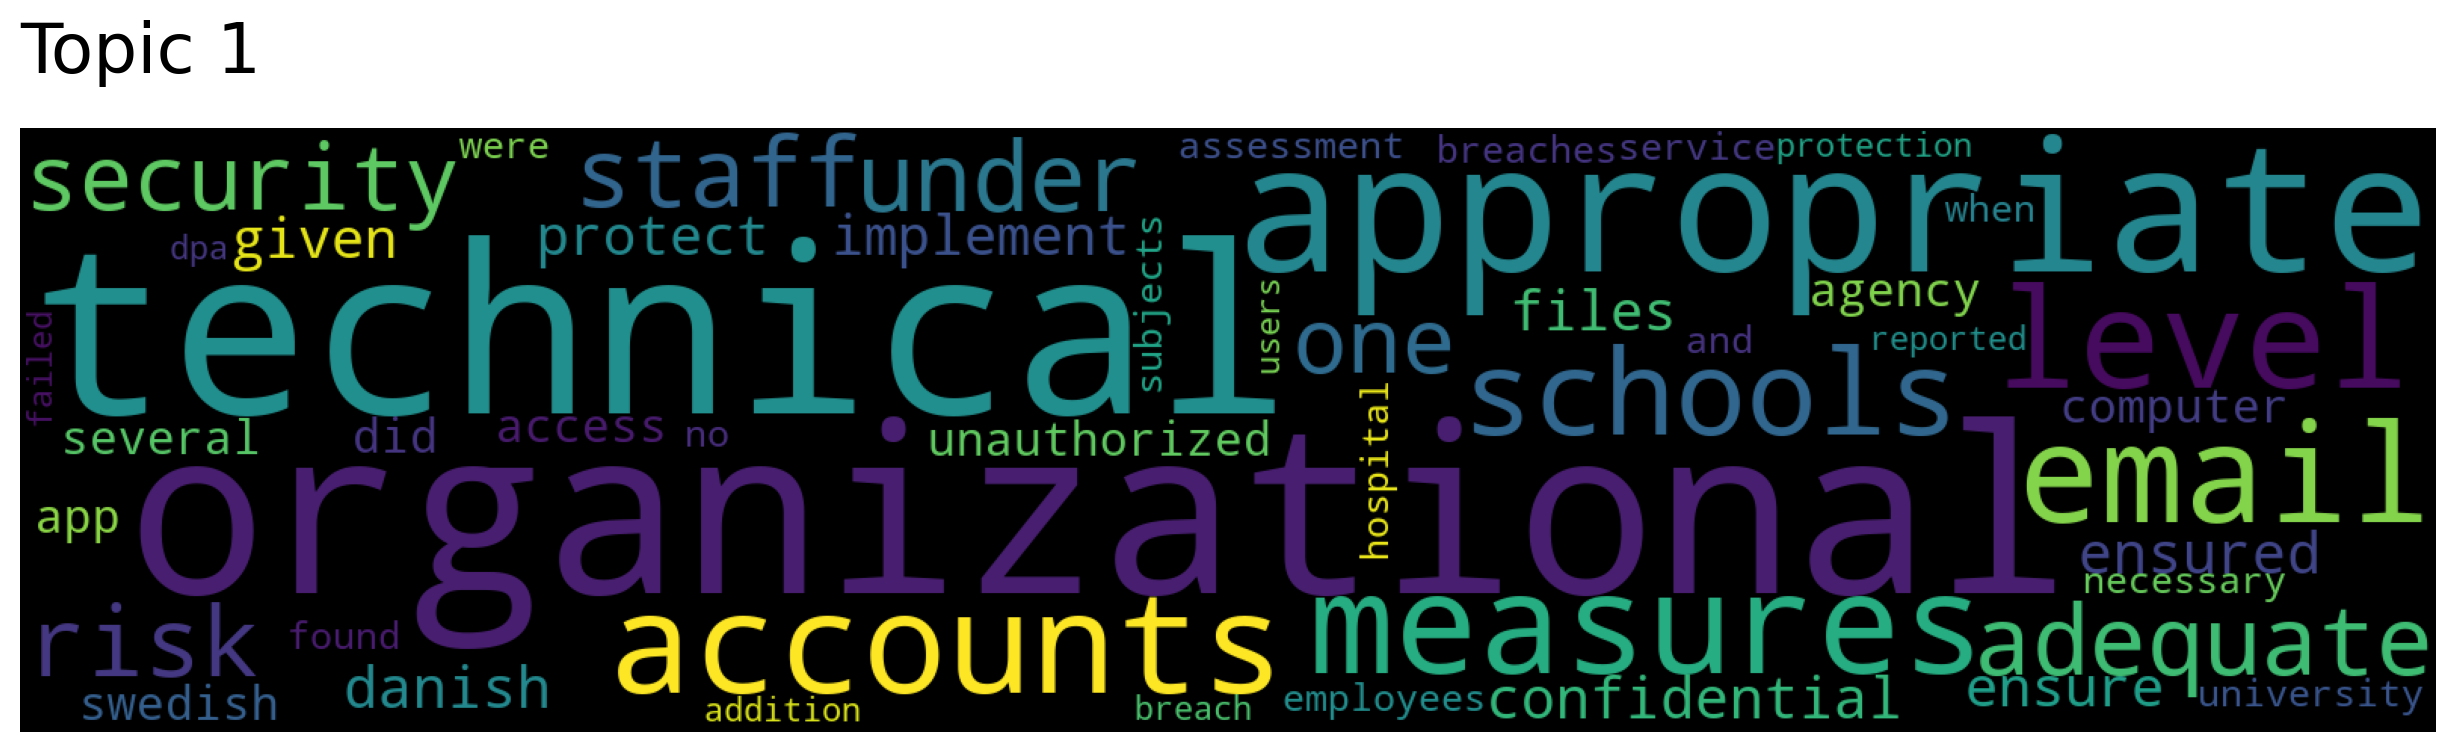

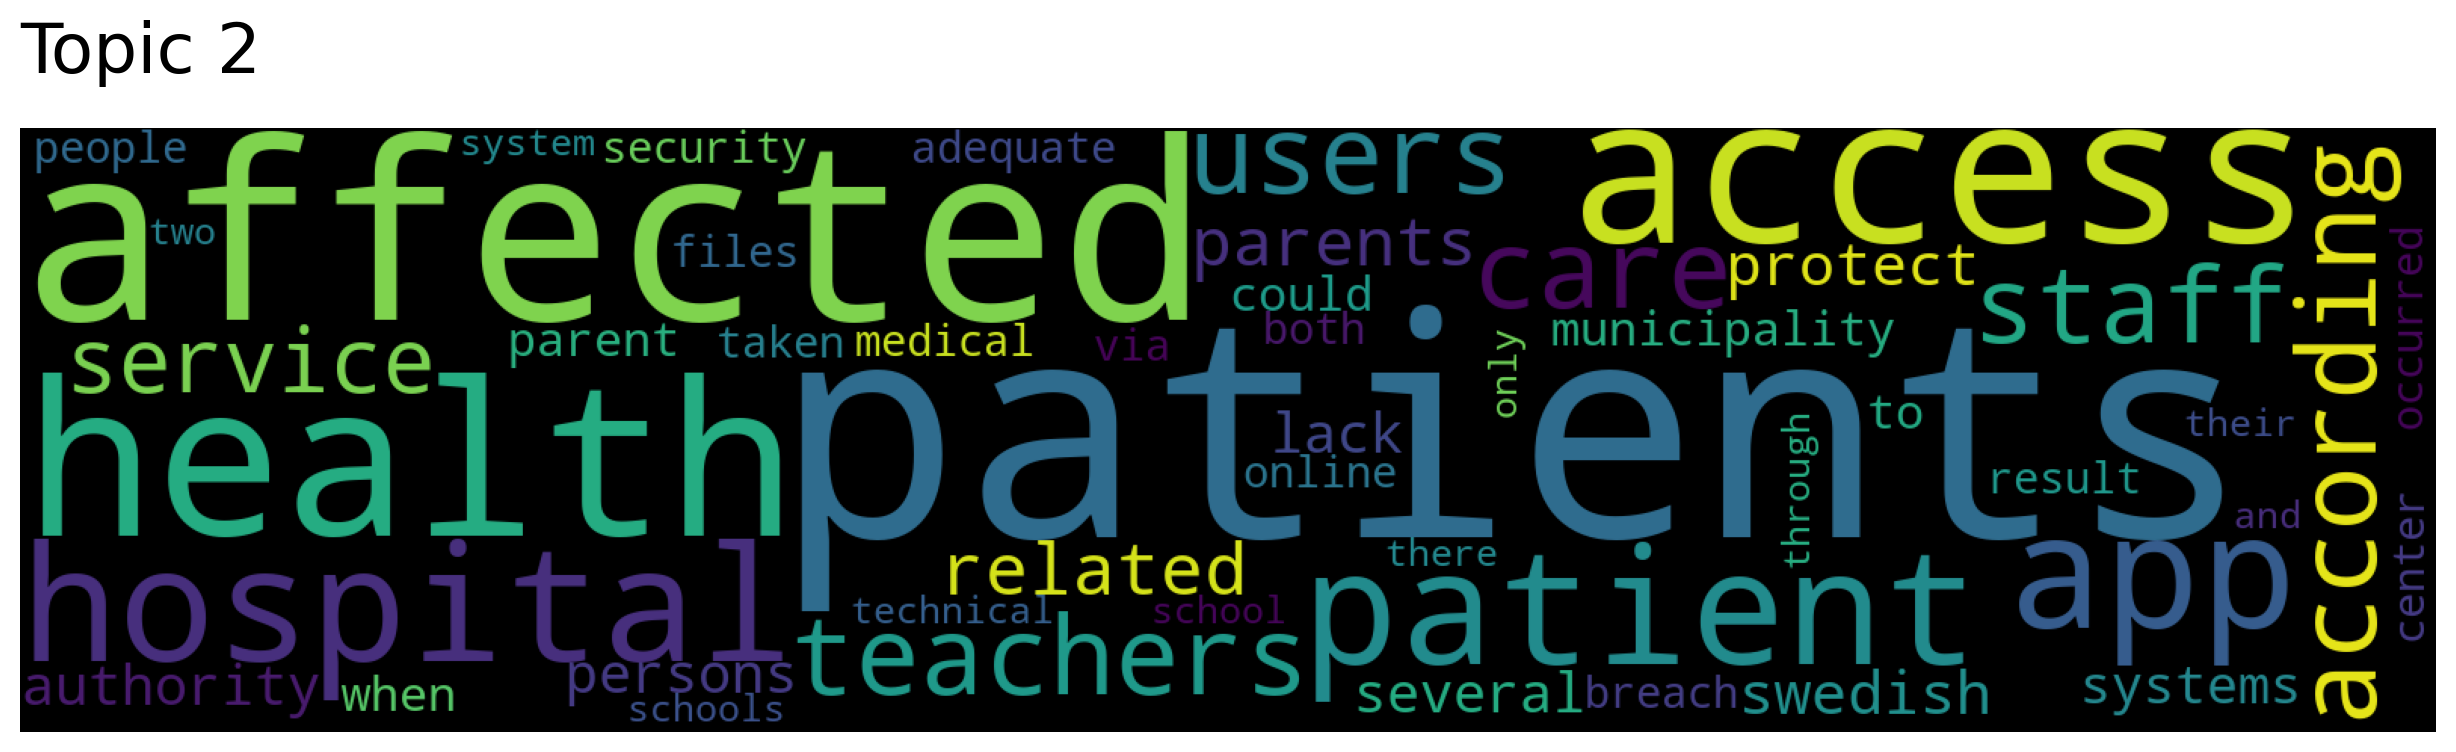

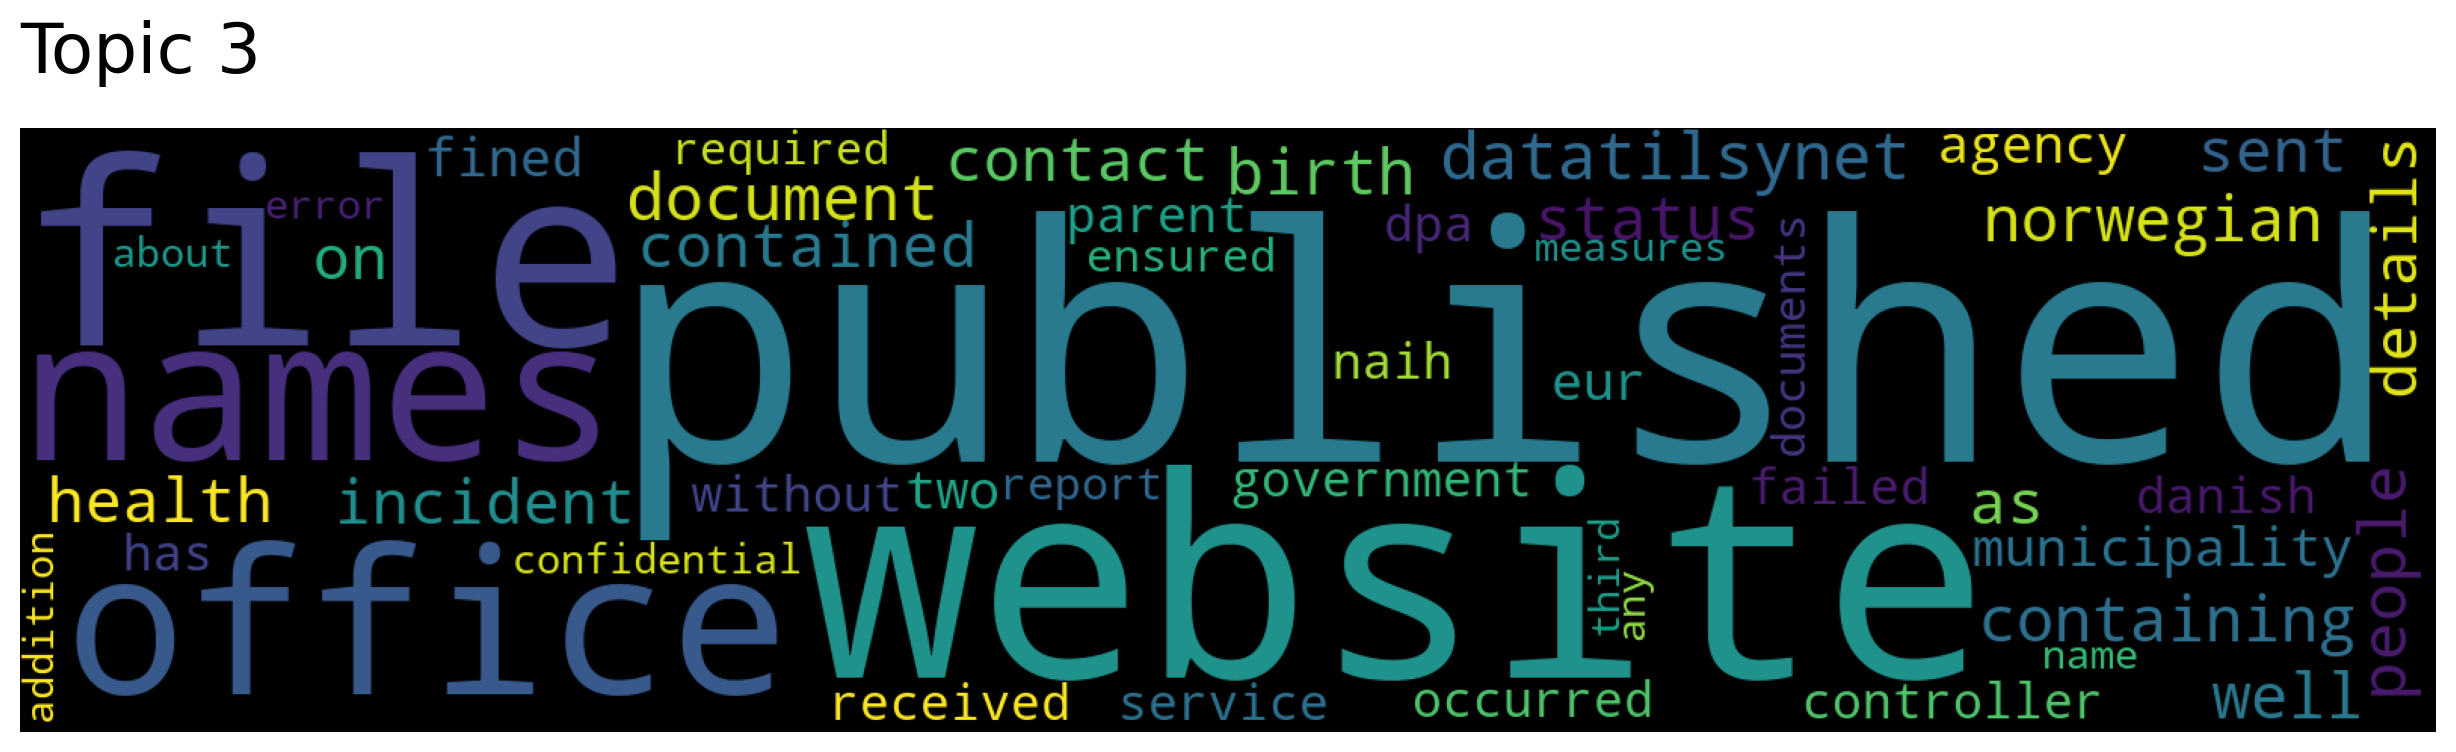

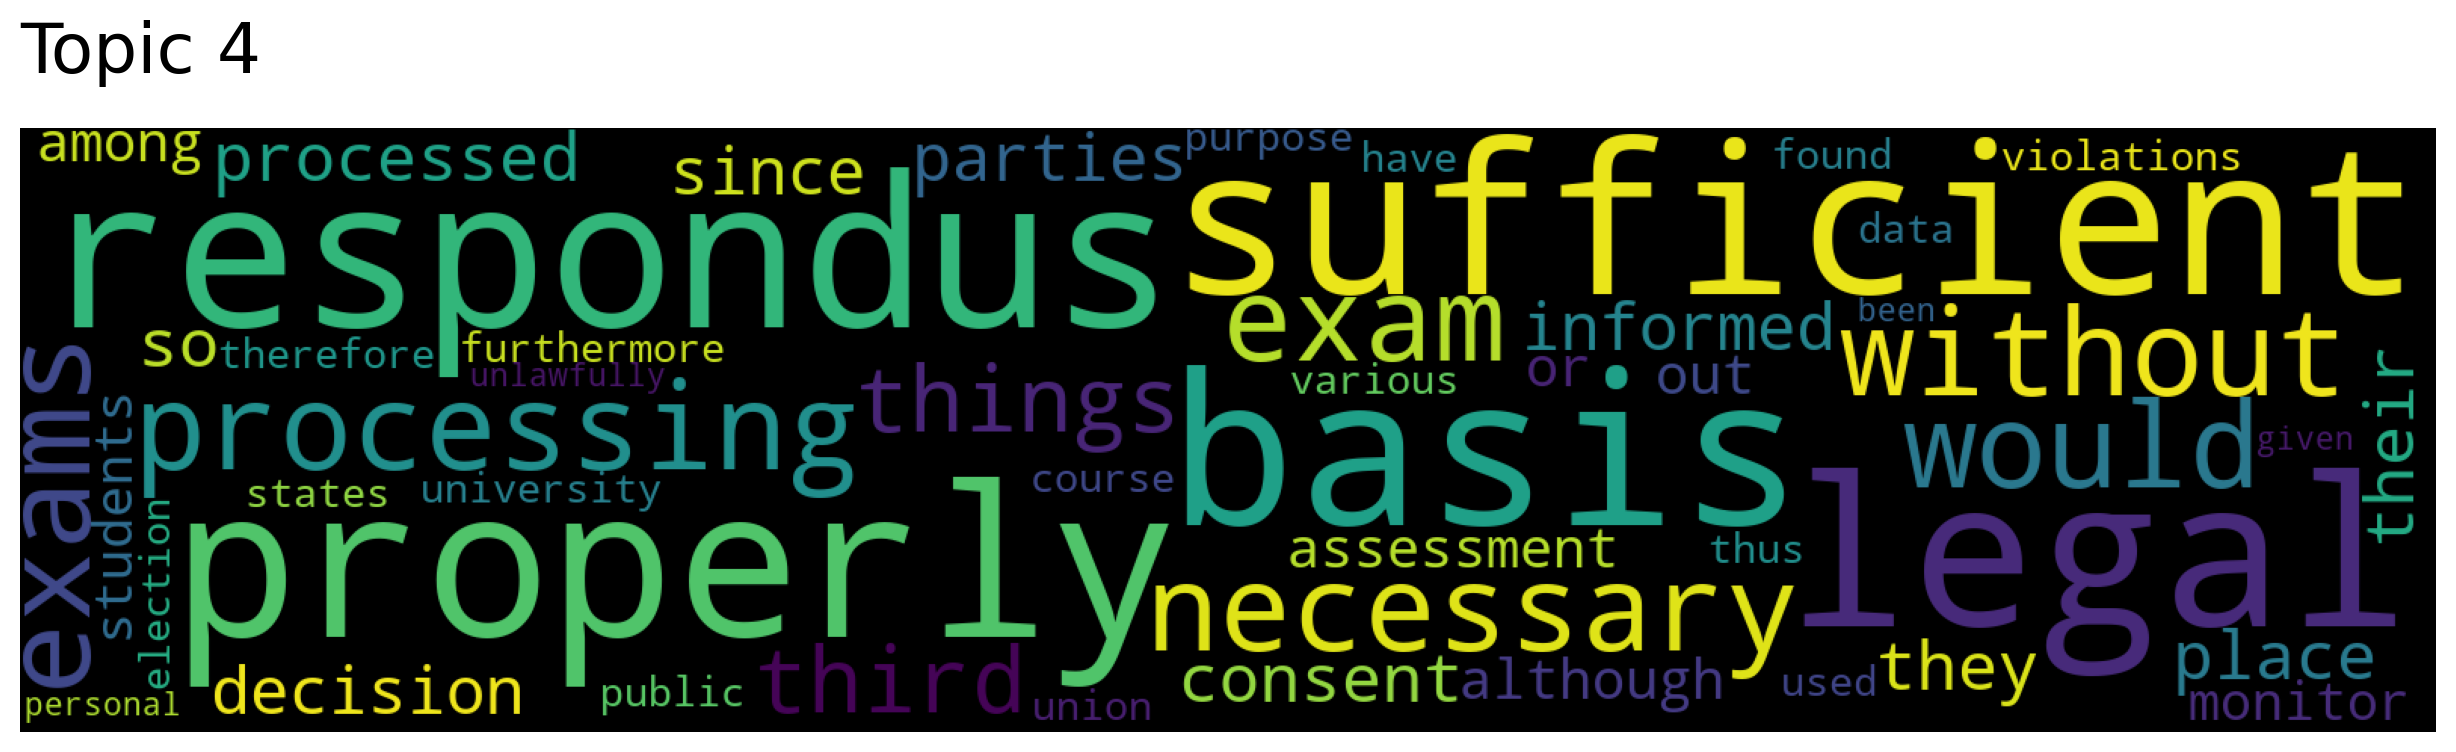

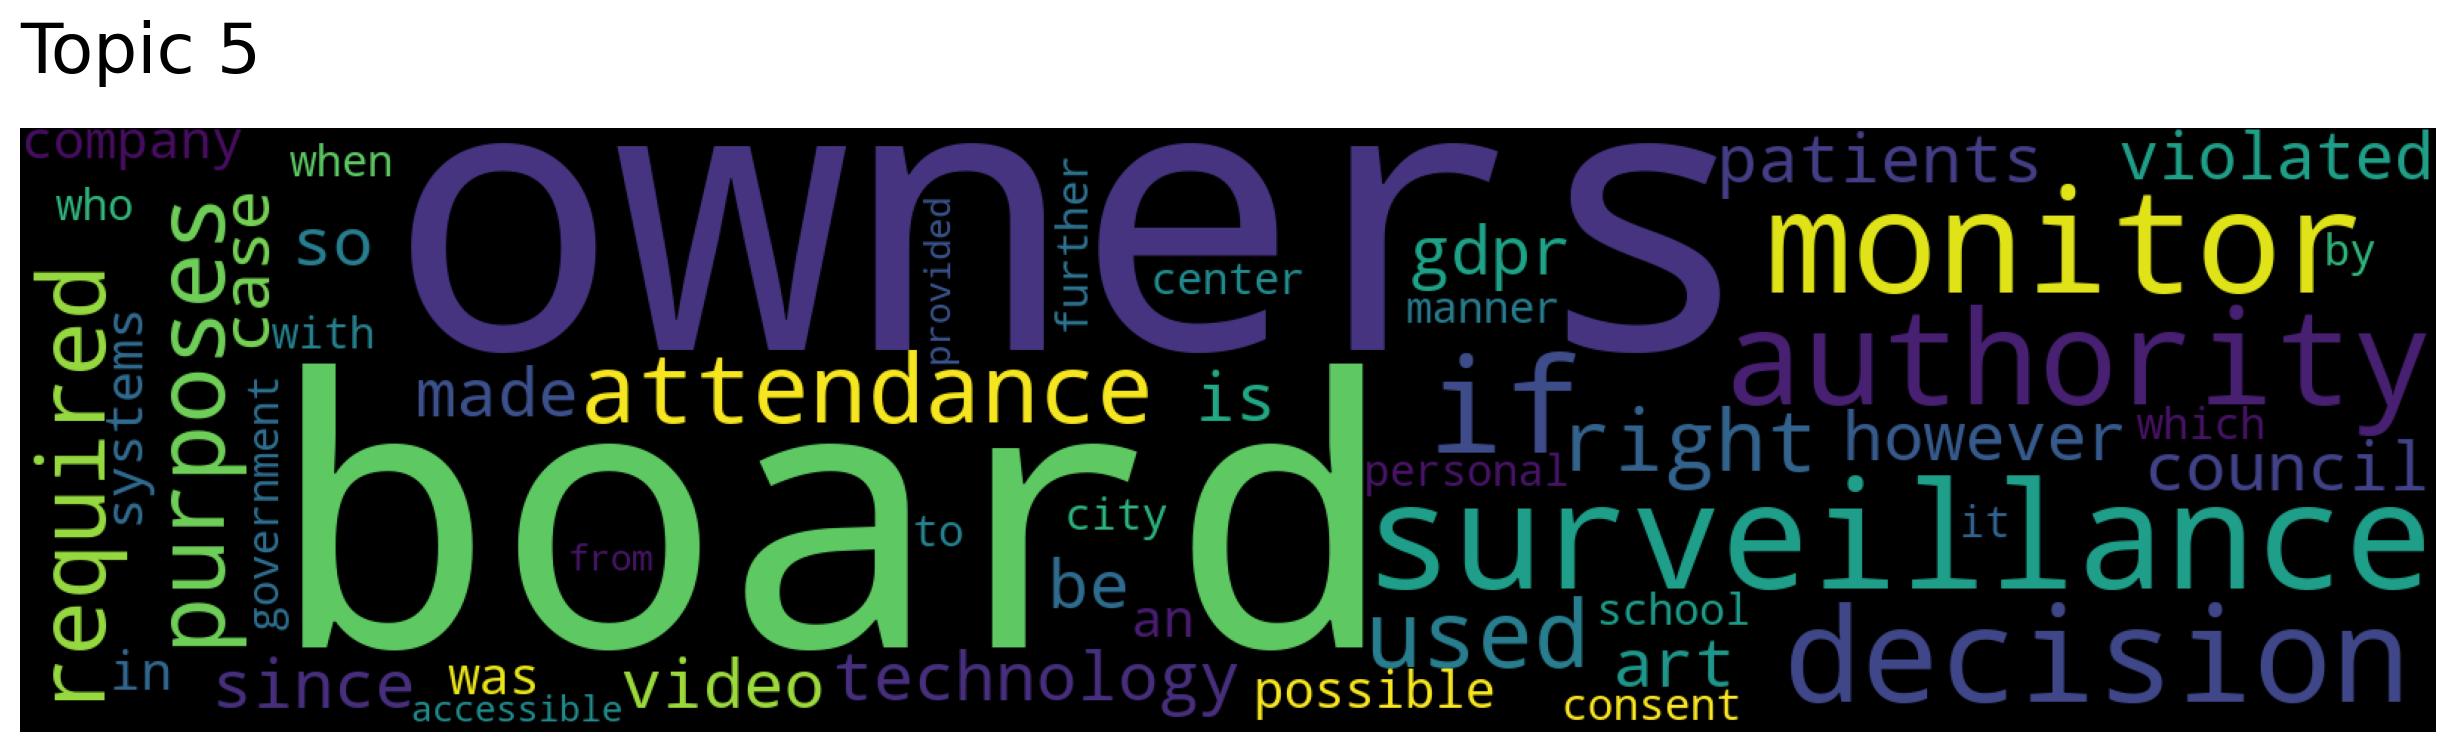

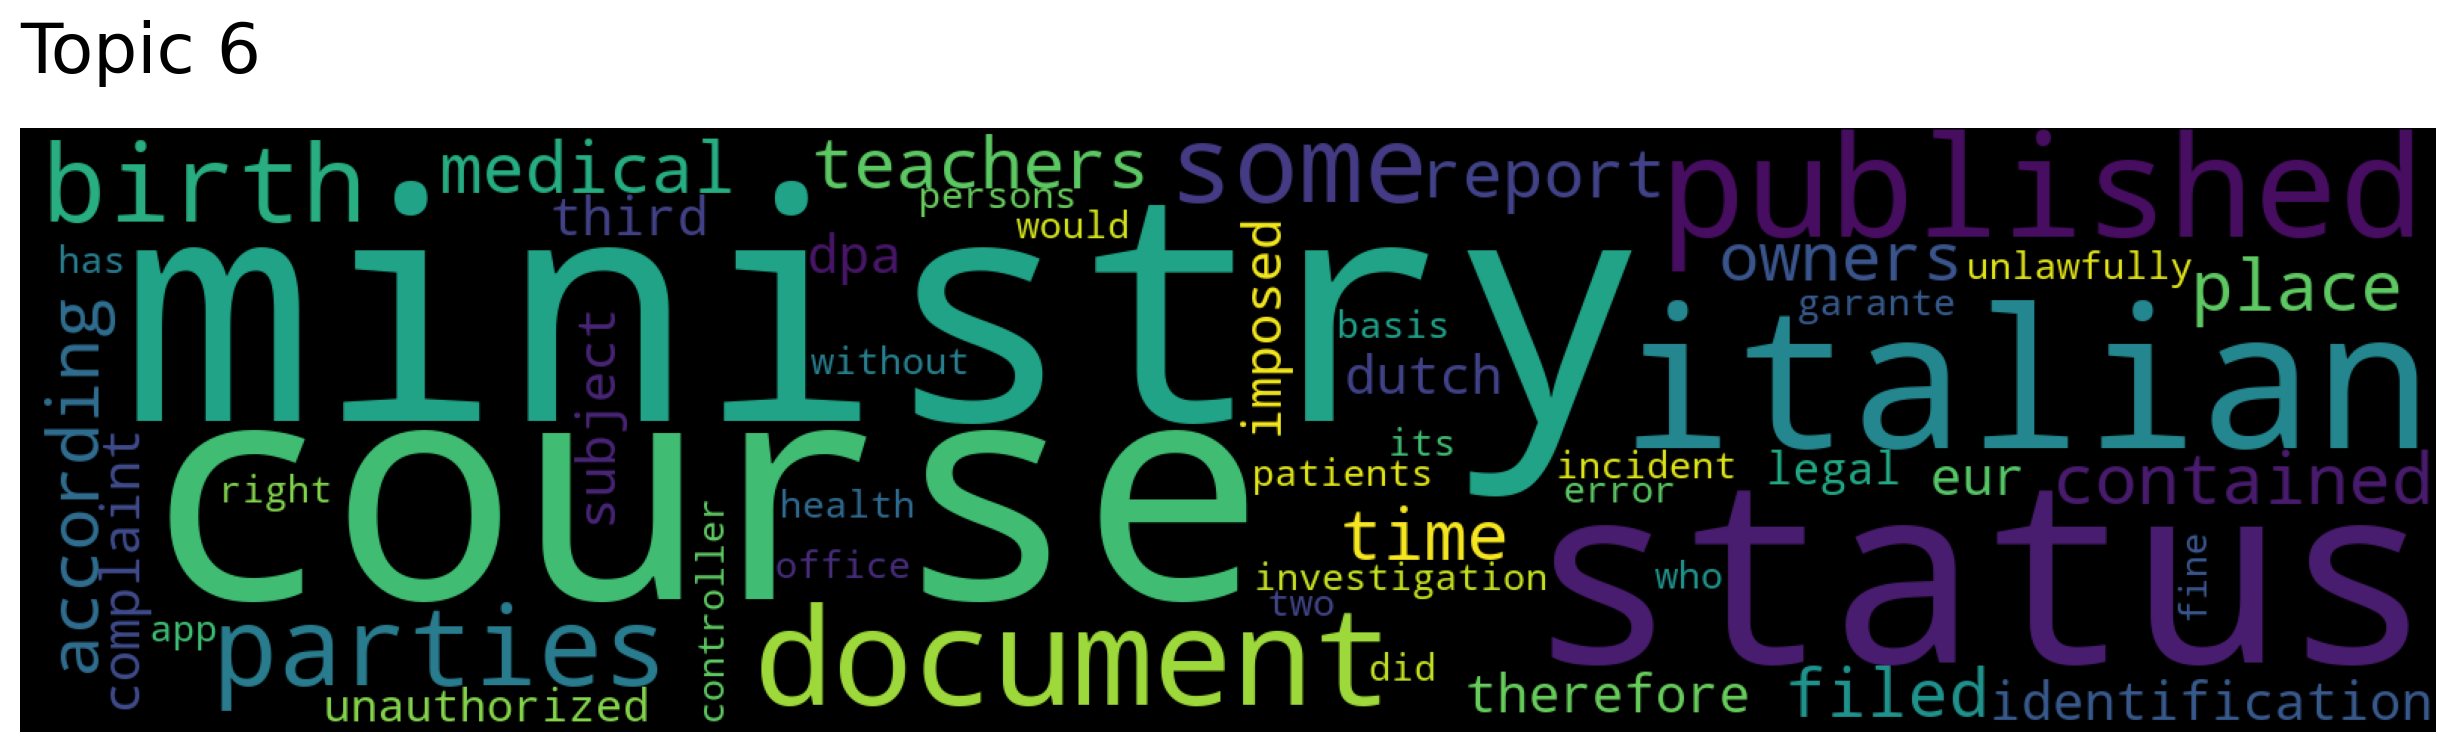

In [44]:
for i in range(7):
    model.generate_topic_wordcloud(i,reduced=True)

In [45]:
topic_names = ["University","without_legal_basis","Family_data","Publishing","Employee_rights_violation","Health_data","Governmental_fines"]

In [46]:
topics = model.doc_top_reduced[:86]

In [47]:
pd.DataFrame(topics).value_counts()

0    17
1    16
2    12
3    12
4    11
5    10
6     8
dtype: int64

## LDA

In [48]:
tokens = []
for rep in reports_preprocessed:
    tks = []
    toks = rep.split()
    for tok in toks:
        tks.append(tok)
    tokens.append(tks)
dictionary = gensim.corpora.Dictionary(tokens)
dictionary.filter_extremes(no_below=5, no_above=0.2, keep_n=100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in tokens]
bow_corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 2),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 2)],
 [(3, 2),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 3),
  (15, 1),
  (16, 2),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 3)],
 [(0, 2),
  (7, 3),
  (10, 1),
  (17, 1),
  (18, 2),
  (19, 1),
  (21, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 3),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 3),
  (37, 3),
  (38, 1)],
 [(6, 1),
  (10, 1),
  (34, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 2)],
 [(34, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1)],
 [(9, 1),
  (43, 1),
  (46, 1),
  (47, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1)],
 [(7, 1),
  (15, 2),
  (22, 1),
  (51, 2),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 2),
  (60, 1),
  (61, 1),
  (62, 2),
  (63, 1)],
 [(16, 1),
  (44, 1),
  (51, 1),
  (56, 1),
  (57, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1)

In [49]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [50]:
def infer_topic(doc,model,topicnames=None):
    doctop = model.get_document_topics(dictionary.doc2bow(doc.split()))
    max_ = 0
    id_ = None
    for top in doctop:
        if top[1] > max_:
            id_ = top[0]
            max_ = top[1]
    if topicnames == None:
        return id_
    else:
        return topicnames[id_]

In [51]:
lda_model_notfidf = gensim.models.LdaMulticore(bow_corpus, num_topics=3, id2word=dictionary, passes=300, workers=14)
for idx, topic in lda_model_notfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.047*"employee" + 0.042*"document" + 0.040*"email" + 0.038*"publish" + 0.032*"student" + 0.030*"school" + 0.029*"report" + 0.029*"file" + 0.025*"incident" + 0.023*"protect"
Topic: 1 Word: 0.075*"patient" + 0.045*"fail" + 0.042*"violation" + 0.038*"hospital" + 0.033*"report" + 0.032*"accord" + 0.026*"government" + 0.025*"public" + 0.023*"authority" + 0.023*"sensitive"
Topic: 2 Word: 0.054*"processing" + 0.050*"student" + 0.049*"process" + 0.042*"parent" + 0.040*"school" + 0.028*"purpose" + 0.027*"university" + 0.027*"administration" + 0.023*"authority" + 0.022*"violation"


In [52]:
reports[8]

'Original summary: A school in Gdansk used biometric fingerprint scanners to authenticate students for the payment process in the school canteen. Although the parents had given their written consent to such data processing, the data protection authority considered the processing of the student data to be unlawful, as the consent to data processing was not given voluntarily. Update: Update: On August 7, 2020, the Provincial Administrative Court in Warsaw overturned the decision of the Polish DPA imposing a fine of EUR 4,600.'

In [53]:
lda_topics = [infer_topic(rep,lda_model_notfidf,["University/School","Patient Data","Sensitive Data"]) for rep in reports_preprocessed]
pd.DataFrame(lda_topics).value_counts()

University/School    33
Sensitive Data       31
Patient Data         22
dtype: int64

In [54]:
import pickle 
import pyLDAvis
from pyLDAvis.gensim_models import prepare
pyLDAvis.enable_notebook()
LDAvis_prepared = prepare(lda_model_notfidf, bow_corpus, dictionary)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.127565 -0.109912       1        1  43.271385
0     -0.163401 -0.050603       2        1  31.700987
1      0.035836  0.160515       3        1  25.027628, topic_info=          Term       Freq      Total Category  logprob  loglift
15     patient  22.000000  22.000000  Default  30.0000  30.0000
7   processing  27.000000  27.000000  Default  29.0000  29.0000
17     process  25.000000  25.000000  Default  28.0000  28.0000
59    hospital  11.000000  11.000000  Default  27.0000  27.0000
43     publish  14.000000  14.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
73    employee   5.020747  22.669510   Topic3  -4.0591  -0.1223
42        file   4.348235  16.347402   Topic3  -4.2029   0.0609
44  university   4.470462  25.729684   Topic3  -4.1752  -0.3650
91    incident   4.086957  13.598221   Topic3  -4.2649   0.1831
2        child   3.959735  15.668804   Topic3  -4.2965   0.0097

[145 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         1  0.810782  accessible
0         3  0.135130  accessible
56        3  0.905523      accord
45        1  0.585301     address
45        2  0.334458     address
...     ...       ...         ...
10        1  0.461870   violation
10        3  0.503858   violation
38        1  0.121997     website
38        2  0.853980     website
76        3  0.921528        work

[191 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

# NMF

### TODO: Filter extremes --> remove common words

In [55]:
from sklearn.decomposition import NMF
model = NMF(n_components=4, init='random', random_state=0)
W = model.fit_transform(df)
H = model.components_

In [56]:
H.shape

(4, 941)

In [57]:
df.shape

(86, 941)

In [58]:
def display_topics(model,feature_names,num_top_words):
    comp = model.components_
    for topic in comp:
        topids = np.argsort(-topic)[:num_top_words]
        names = [feature_names[tid] for tid in topids]
        print(names)

In [59]:
display_topics(model,vec.get_feature_names(),10)

['data', 'patient', 'controller', 'dpa', 'art', 'gdpr', 'access', 'subject', 'violation', 'health']
['municipality', 'dpa', 'parent', 'school', 'data', 'student', 'protection', 'security', 'breach', 'address']
['basis', 'sufficient', 'university', 'student', 'legal', 'public', 'apply', 'require', 'personal', 'data']
['community', 'website', 'professional', 'court', 'publish', 'include', 'case', 'data', 'subject', 'personal']


In [60]:
topic_names = ["data","school","university","publishing"]

In [61]:
topic_scores = np.matmul(df,H.T)
topic_scores
nmf_topics = [topic_names[np.argmin(np.array(topic_scores)[i,:])] for i in range(86)]    

# YAKE

In [62]:
kw_extractor = yake.KeywordExtractor()
keywords = kw_extractor.extract_keywords(reports[0])

for kw in keywords:
    print(kw)

('Population Information System', 0.00016553377573418301)
('Population Register', 0.0024957952879202327)
('Population Information', 0.0028089171571177903)
('Business Registers', 0.003059632519082117)
('Republic of Lithuania', 0.0031354756301609343)
('Information System', 0.0034437362696053088)
('Municipal Administration', 0.0034437362696053088)
('State Centre', 0.0034437362696053088)
('Centre for Business', 0.0034437362696053088)
('personal data processing', 0.00599865165423915)
('personal data', 0.006058590730635905)
('child was replaced', 0.014563749315783034)
('biological parents', 0.014563749315783034)
('adopted child', 0.01647523569925652)
('subsequently accessible', 0.01647523569925652)
('data synchronization', 0.017497120833141113)
('Population', 0.02390684792154303)
('data', 0.03376805089288141)
('data processing', 0.04314519318944623)
('personal', 0.04405374893542128)


In [63]:
data_sorted = data.sort_values("Fine",inplace=False)

In [64]:
data_sorted = data_sorted.dropna(subset=["Fine"],axis=0)

In [65]:
for case in data_sorted.iterrows():
    if case[1]['Fine'] > 500000:
        text = case[1]['Summary']
        print(kw_extractor.extract_keywords(text))
    

[('Dutch Foreign Ministry', 0.00174523325012), ('Foreign Ministry', 0.008269678635000033), ('Dutch Foreign', 0.009047166461114718), ('Dutch DPA', 0.011189117208092158), ('fine of EUR', 0.011593782987190151), ('National Visa Information', 0.02386152184040337), ('Dutch', 0.02596384748295354), ('Ministry', 0.03090735863155797), ('imposed a fine', 0.034851881174427134), ('Visa Information System', 0.04241284494470463), ('DPA', 0.04261812971802797), ('Foreign', 0.043166026953893294), ('EUR', 0.0624518056861714), ('National Visa', 0.06640735703302118), ('security', 0.0914532297593303), ('Information', 0.10425147472822142), ('significant security deficiencies', 0.10469775613943169), ('Visa', 0.10537139229643759), ('security measures', 0.10861371765738499), ('Visa Information', 0.10971300511296929)]
[('Enschede EUR', 0.007124671777546863), ('Dutch DPA', 0.019058573060734253), ('Enschede', 0.05684008990236405), ('fined the municipality', 0.061285330233532546), ('EUR', 0.062229580727337024), ('m

## LegalBERT

In [66]:
import BertEmbeddings
from keybert import KeyBERT

In [67]:
from transformers import BertModel, BertConfig

# Initializing a BERT bert-base-uncased style configuration
configuration = BertConfig()

# Initializing a model from the bert-base-uncased style configuration
model = BertModel(configuration)

# Accessing the model configuration
configuration = model.config

kw_model_basebert = KeyBERT(model=BertModel.from_pretrained("bert-base-uncased"))

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


#### Keywords from first report

In [68]:
kw_model = KeyBERT(model=BertModel.from_pretrained("nlpaueb/legal-bert-small-uncased"))
keywords = kw_model.extract_keywords(reports[0])
keywords

Some weights of the model checkpoint at nlpaueb/legal-bert-small-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[('data', 0.4422),
 ('population', 0.4128),
 ('databases', 0.3635),
 ('adopted', 0.3617),
 ('confidentiality', 0.3503)]

In [69]:
kw_model.extract_keywords(". ".join(reports),top_n=20)

[('data', 0.4472),
 ('population', 0.4277),
 ('datatilsynet', 0.423),
 ('citizens', 0.4217),
 ('registry', 0.4131),
 ('records', 0.4099),
 ('negligence', 0.4034),
 ('misfiled', 0.3999),
 ('adopted', 0.3863),
 ('integritetsskyddsmyndigheten', 0.3739),
 ('public', 0.3733),
 ('documented', 0.3694),
 ('databases', 0.3684),
 ('registered', 0.3638),
 ('civilstyrelsen', 0.359),
 ('outdated', 0.3579),
 ('individuals', 0.3574),
 ('database', 0.356),
 ('information', 0.3539),
 ('municipality', 0.3525)]

# Keyword FA experiment

In [70]:
def spacylemmatize(doc):
    doc = doc.replace(","," ")
    doc = nlp(doc)
    empty_list = []
    for token in doc:
        try:
            float(token.text)
        except:
            empty_list.append(token.lemma_)
    return " ".join(empty_list)

sdas = " ".join([spacylemmatize(rep) for rep in reports])

In [71]:
def remove_digits(doc):
    for i in range(10):
        doc = doc.replace(str(i),"")
    return doc

reports_nodig = [remove_digits(rep) for rep in reports]

kws = kw_model.extract_keywords(" ".join(reports_nodig),keyphrase_ngram_range=(1, 1),top_n=200)

In [72]:
kw_dict = [nlp(kw[0])[0].lemma_ for kw in kws]

In [73]:
df_dict = dict()
for kw in kw_dict:
    df_dict.update({kw : np.zeros(72)})

In [74]:
bertdf = pd.DataFrame(df_dict)
bertdf

datum  datatilsynet  population  citizen  registry  record  negligence  \
0     0.0           0.0         0.0      0.0       0.0     0.0         0.0   
1     0.0           0.0         0.0      0.0       0.0     0.0         0.0   
2     0.0           0.0         0.0      0.0       0.0     0.0         0.0   
3     0.0           0.0         0.0      0.0       0.0     0.0         0.0   
4     0.0           0.0         0.0      0.0       0.0     0.0         0.0   
..    ...           ...         ...      ...       ...     ...         ...   
67    0.0           0.0         0.0      0.0       0.0     0.0         0.0   
68    0.0           0.0         0.0      0.0       0.0     0.0         0.0   
69    0.0           0.0         0.0      0.0       0.0     0.0         0.0   
70    0.0           0.0         0.0      0.0       0.0     0.0         0.0   
71    0.0           0.0         0.0      0.0       0.0     0.0         0.0   

    misfile  adopt  public  ...  absence  organisation  national  accord  usa  \
0       0.0    0.0     0.0  ...      0.0           0.0       0.0     0.0  0.0   
1       0.0    0.0     0.0  ...      0.0           0.0       0.0     0.0  0.0   
2       0.0    0.0     0.0  ...      0.0           0.0       0.0     0.0  0.0   
3       0.0    0.0     0.0  ...      0.0           0.0       0.0     0.0  0.0   
4       0.0    0.0     0.0  ...      0.0           0.0       0.0     0.0  0.0   
..      ...    ...     ...  ...      ...           ...       ...     ...  ...   
67      0.0    0.0     0.0  ...      0.0           0.0       0.0     0.0  0.0   
68      0.0    0.0     0.0  ...      0.0           0.0       0.0     0.0  0.0   
69      0.0    0.0     0.0  ...      0.0           0.0       0.0     0.0  0.0   
70      0.0    0.0     0.0  ...      0.0           0.0       0.0     0.0  0.0   
71      0.0    0.0     0.0  ...      0.0           0.0       0.0     0.0  0.0   

    ålesund  custom  share  steal  fragment  
0       0.0     0.0    0.0    0.0       0.0  
1       0.0     0.0    0.0    0.0       0.0  
2       0.0     0.0    0.0    0.0       0.0  
3       0.0     0.0    0.0    0.0       0.0  
4       0.0     0.0    0.0    0.0       0.0  
..      ...     ...    ...    ...       ...  
67      0.0     0.0    0.0    0.0       0.0  
68      0.0     0.0    0.0    0.0       0.0  
69      0.0     0.0    0.0    0.0       0.0  
70      0.0     0.0    0.0    0.0       0.0  
71      0.0     0.0    0.0    0.0       0.0  

[72 rows x 176 columns]

In [75]:
for i,rep in enumerate(reports):
    kws_rep = kw_model.extract_keywords(rep,keyphrase_ngram_range=(1, 2),top_n=200)
    for kw in kws_rep:
        kwrd = nlp(kw[0])[0].lemma_
        try:
            bertdf[kwrd][i] = kw[1]
        except:
            pass
            #print(kw[0] + " not found")
    print(str(i) + " done")

0 done
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
51 done
52 done
53 done
54 done
55 done
56 done
57 done
58 done
59 done
60 done
61 done
62 done
63 done
64 done
65 done
66 done
67 done
68 done
69 done
70 done
71 done
72 done
73 done
74 done
75 done
76 done
77 done
78 done
79 done
80 done
81 done
82 done
83 done
84 done
85 done


In [76]:
colcounts = np.zeros(len(bertdf.columns))
for i,col in enumerate(bertdf.columns):
    colcounts[i] = np.sum(np.ceil(bertdf[col]))

In [77]:
topxcols = np.argsort(-colcounts)[:20]

In [78]:
bertdf_selection = bertdf.iloc[:,topxcols]



 PCA :

[[-0.19724711  0.0967513   0.12730747]
 [-0.20316785  0.17203392  0.05547627]
 [ 0.85146845 -0.02745091 -0.17167504]
 [-0.00356469  0.53011859  0.03560066]
 [ 0.06289372  0.04554099  0.36423921]
 [ 0.22865853  0.2354843   0.52525004]
 [ 0.06542284  0.36053901 -0.09253691]
 [ 0.09246482  0.32941501 -0.56537488]
 [ 0.07281377  0.01652801  0.14049473]
 [-0.07348875  0.35142302  0.16393577]
 [-0.03843092  0.22855305 -0.07367383]
 [-0.02646031  0.00703267  0.01750393]
 [-0.15188541 -0.01154792  0.06148156]
 [ 0.10917208  0.07170304  0.08985167]
 [ 0.15404914  0.09958801  0.08199252]
 [ 0.20465067  0.0246034   0.34368333]
 [ 0.00098985  0.04833168 -0.07244803]
 [-0.08115896  0.42562612 -0.08535054]
 [ 0.07138329  0.08222323  0.10633928]
 [-0.02390244 -0.03354883  0.01794754]]


 Unrotated FA :

[[-0.04210999  0.01653719  0.01606531]
 [-0.04683041  0.01994935 -0.00373216]
 [ 0.17556202  0.01027376 -0.01390686]
 [-0.00556536  0.055905   -0.00769665]
 [ 0.01296034  0.02041777  0.06443

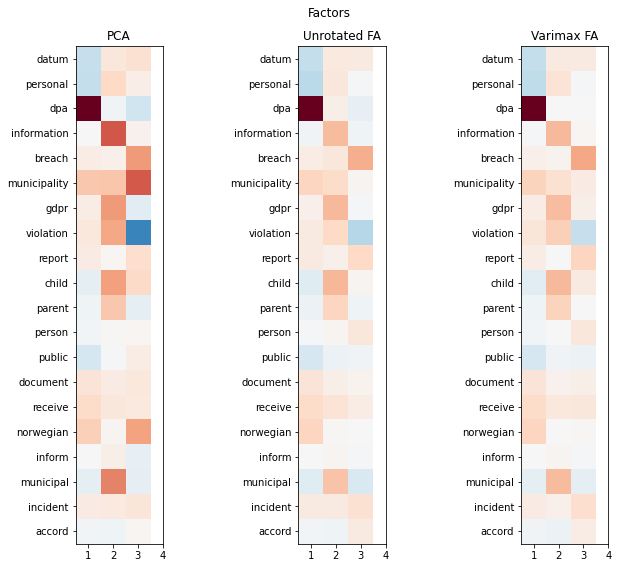

FactorAnalysis(n_components=3, rotation='varimax')

In [79]:
factor_analysis(bertdf_selection,3)

In [80]:
bertdf_selection.to_excel("bertdf.xlsx")

# Model

In [229]:
top2vectops = pd.read_csv("top2vectopics.csv",index_col=False)['0']

In [230]:
top2vectops

0                   Family_data
1                    Publishing
2                   Family_data
3           without_legal_basis
4           without_legal_basis
                ...            
81                   Publishing
82    Employee_rights_violation
83                   University
84          without_legal_basis
85                   Publishing
Name: 0, Length: 86, dtype: object

### prune articles, remove rare ones

In [231]:
def article_dummies(arts):
    df = pd.DataFrame()
    for i,articles in enumerate(arts):
        for art in articles:
            if "Art_" + str(art.article) not in df.columns:
                df["Art_" + str(art.article)] = np.zeros(len(arts))
                
                df["Art_" + str(art.article)][i] = 1
            else:
                df["Art_" + str(art.article)][i] = 1
    return df

In [232]:
article_matrix = article_dummies([parse_articles(doc) for doc in data['V8']])

In [233]:
for col in article_matrix.columns:
    if(np.sum(article_matrix[col]) < 5):
        article_matrix = article_matrix.drop([col],axis=1)

In [234]:
data['V8']

0                Art. 5 (1) d) GDPR, Art. 5 (1) f) GDPR
1                               Art. 32 (1) b), d) GDPR
2              Art. 13 GDPR, Art. 12 GPDR, Art. 15 GDPR
3                                    Art. 5 (1) c) GDPR
4                                           Art. 6 GDPR
                            ...                        
81                           Art. 32 GDPR, Art. 33 GDPR
82    Art. 5 (1) a) GDPR, Art. 6 GDPR, Art. 9 GDPR, ...
83    Art. 5 (1) a), f) GDPR, Art. 6 (1) e) GDPR, Ar...
84    Art. 5 GDPR, Art. 6 GDPR, Art. 9 GDPR, Art. 2-...
85    Art. 5 (1) a), c) GDPR, Art. 6 GDPR, Art. 2-te...
Name: V8, Length: 86, dtype: object

In [235]:
data_model = data.copy()

In [236]:
df_c = pd.concat([data_model.reset_index(drop=True), fa_scores, article_matrix], axis=1)

In [237]:
df_c.shape

(86, 28)

In [238]:
df_c['Fine'] = np.log(df_c['Fine'])

In [239]:
fa_scores.shape

(86, 3)

In [240]:
df_c.columns

Index(['Unnamed: 0', 'V1', 'Country', 'Region', 'Date', 'Fine', 'Name',
       'Ranking', 'Student Count', 'Employees ', 'Budget (millions)', 'V8',
       'V9', 'V10', 'Summary', 'Family', 'University_Student',
       'Sensitive_Personal_Employee', 'Art_5', 'Art_32', 'Art_13', 'Art_12',
       'Art_15', 'Art_6', 'Art_9', 'Art_33', 'Art_34', 'Art_35'],
      dtype='object')

In [241]:
df_c = df_c.drop(['Unnamed: 0', 'V1', 'Country', 'Date', 'Name',
       'Ranking', 'Student Count', 'Employees ', 'Budget (millions)', 'V8','V9',
       'V10', 'Summary'],axis=1)

In [242]:
region_dummies = pd.get_dummies(df_c['Region'],prefix="Region")
region_dummies.columns = [col.replace(" ","_") for col in region_dummies.columns]

In [243]:
df_c = pd.concat([df_c.drop(['Region'],axis=1),region_dummies],axis=1)

In [244]:
#type_dummies = pd.get_dummies(df_c['V9'],prefix="Type")
#type_dummies.columns = [col.replace(" ","_").replace("-","_") for col in type_dummies.columns]
#df_c = pd.concat([df_c.drop(['V9'],axis=1),type_dummies],axis=1)

In [245]:
topic_dummies = pd.get_dummies(top2vectops,prefix="Topic")
df_c = pd.concat([df_c,topic_dummies],axis=1)

In [246]:
df_c

Fine    Family  University_Student  Sensitive_Personal_Employee  \
0    9.615805  0.646469           -0.196654                    -0.030140   
1   10.803649  0.777510           -1.085338                     0.139248   
2   11.608236 -0.413133           -0.336705                    -0.292413   
3    6.907755 -0.815084            0.843497                    -0.491655   
4    8.517193 -0.516380            0.591332                    -0.115973   
..        ...       ...                 ...                          ...   
81   9.503010 -0.592840           -0.379762                     1.594283   
82   9.210340 -0.686449            0.063987                     2.439121   
83  10.819778 -0.535011           -0.023277                     0.272228   
84   7.824046 -0.502438            0.171662                    -0.141133   
85   7.600902 -0.514045           -0.179828                    -0.123365   

    Art_5  Art_32  Art_13  Art_12  Art_15  Art_6  ...  Region_Northern_Europe  \
0     1.0     0.0     0.0     0.0     0.0    0.0  ...                       1   
1     0.0     1.0     0.0     0.0     0.0    0.0  ...                       1   
2     0.0     0.0     1.0     1.0     1.0    0.0  ...                       1   
3     1.0     0.0     0.0     0.0     0.0    0.0  ...                       0   
4     0.0     0.0     0.0     0.0     0.0    1.0  ...                       0   
..    ...     ...     ...     ...     ...    ...  ...                     ...   
81    0.0     1.0     0.0     0.0     0.0    0.0  ...                       1   
82    1.0     0.0     0.0     0.0     0.0    1.0  ...                       0   
83    1.0     1.0     0.0     0.0     0.0    1.0  ...                       0   
84    1.0     0.0     0.0     0.0     0.0    1.0  ...                       0   
85    1.0     0.0     0.0     0.0     0.0    1.0  ...                       0   

    Region_Southern_Europe  Region_Western_Europe  \
0                        0                      0   
1                        0                      0   
2                        0                      0   
3                        1                      0   
4                        0                      1   
..                     ...                    ...   
81                       0                      0   
82                       1                      0   
83                       1                      0   
84                       1                      0   
85                       1                      0   

    Topic_Employee_rights_violation  Topic_Family_data  \
0                                 0                  1   
1                                 0                  0   
2                                 0                  1   
3                                 0                  0   
4                                 0                  0   
..                              ...                ...   
81                                0                  0   
82                                1                  0   
83                                0                  0   
84                                0                  0   
85                                0                  0   

    Topic_Governmental_fines  Topic_Health_data  Topic_Publishing  \
0                          0                  0                 0   
1                          0                  0                 1   
2                          0                  0                 0   
3                          0                  0                 0   
4                          0                  0                 0   
..                       ...                ...               ...   
81                         0                  0                 1   
82                         0                  0                 0   
83                         0                  0                 0   
84                         0                  0                 0   
85                         0  

In [205]:
df_c.to_csv("df_c.csv")

In [206]:
def stepwise_model_reduction(x,y,model_fun=smf.ols,fam=None):
    data = pd.concat([y,x],axis=1)
    aics = []
    bics = []
    removed = []
    models = []
    for i in range(len(x.columns)):
        formula = y.name + " ~ "
        for col in x.columns:
            formula += col
            if col != x.columns[-1]:
                formula += " + "
        dta = pd.concat([x,y],axis=1)
        if model_fun == smf.glm:
            print("fitting glm")
            model = model_fun(formula,data=dta,family=fam)
        else:
            model = model_fun(formula,data=dta)
        ps = model.fit().pvalues
        #print(ps)
        if np.argmax(ps) == 0:
            cors = [np.abs(np.corrcoef(y,x[col])[0,1]) for col in x.columns]
            #print(cors)
            worstvar = ps.index[np.argmin(cors)]
        else:
            worstvar = ps.index[np.argmax(ps)]
        #print(worstvar)
        if worstvar in x.columns:
            #print(model.fit().aic)
            aics.append(model.fit().aic)
            bics.append(model.fit().bic)
            removed.append(worstvar)
            models.append(model)
            x = x.drop([worstvar],axis=1)
        else:
            print(worstvar)
    print("Best model:\n======================================================")
    print(models[np.argmin(aics)].fit().summary())
    return {"Models":models,"Removed":removed,"AICs":aics,"BICs":bics}

In [207]:
df_c_nooutlier = df_c.drop(np.argmax(df_c['Fine']),axis=0)

In [208]:
sr = stepwise_model_reduction(df_c_nooutlier.drop(['Fine'],axis=1),df_c_nooutlier['Fine'])

Best model:
                            OLS Regression Results                            
Dep. Variable:                   Fine   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     11.86
Date:                Wed, 22 Jun 2022   Prob (F-statistic):           1.38e-11
Time:                        14:18:26   Log-Likelihood:                -120.10
No. Observations:                  80   AIC:                             262.2
Df Residuals:                      69   BIC:                             288.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept   

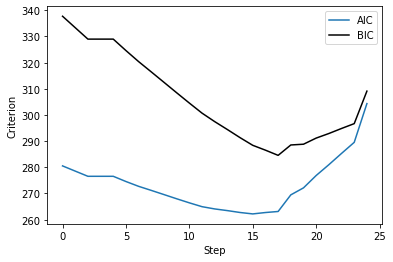

In [209]:
plt.plot(range(len(sr['AICs'])),sr['AICs'],label="AIC")
plt.plot(range(len(sr['BICs'])),sr['BICs'],color="black",label="BIC")
#plt.plot([26,26],[299,318],label="Optimum",linestyle="dashed")
plt.legend()
plt.xlabel("Step")
plt.ylabel("Criterion")
plt.savefig("AICBIC_ols.png",dpi=400)
plt.show()

In [211]:
model_bic_ols = sr['Models'][np.argmin(sr['BICs'])].fit()
model_bic_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Fine   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     13.81
Date:                Wed, 22 Jun 2022   Prob (F-statistic):           7.10e-12
Time:                        14:18:38   Log-Likelihood:                -122.56
No. Observations:                  80   AIC:                             263.1
Df Residuals:                      71   BIC:                             284.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    6.7569      0.435     15.541      0.000       5.890       7.624
Art_32                       1.4996      0.342      4.380      0.000       0.817       2.182
Art_13                       1.9119      0.465      4.116      0.000       0.986       2.838
Art_9                        1.4545      0.425      3.420      0.001       0.607       2.302
Region_Northern_Europe       2.1012      0.459      4.581      0.000       1.187       3.016
Region_Southern_Europe       1.2889      0.461      2.795      0.007       0.369       2.208
Region_Western_Europe        2.0257      0.618      3.280      0.002       0.794       3.257
Topic_Governmental_fines     1.6342      0.533      3.066      0.003       0.571       2.697
Topic_University             1.2032      0.362      3.324      0.001       0.482       1.925
==============================================================================
Omnibus:                        0.987   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.611   Jarque-Bera (JB):                0.448
Skew:                          -0.030   Prob(JB):                        0.799
Kurtosis:                       3.362   Cond. No.                         8.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [212]:
np.exp(model_bic_ols.params)

Intercept                   859.981732
Art_32                        4.479916
Art_13                        6.766238
Art_9                         4.282429
Region_Northern_Europe        8.175710
Region_Southern_Europe        3.628732
Region_Western_Europe         7.581650
Topic_Governmental_fines      5.125603
Topic_University              3.330766
dtype: float64

In [213]:
from scipy.stats import shapiro

In [214]:
shapiro(model_bic_ols.resid)

ShapiroResult(statistic=0.9860888719558716, pvalue=0.540310800075531)

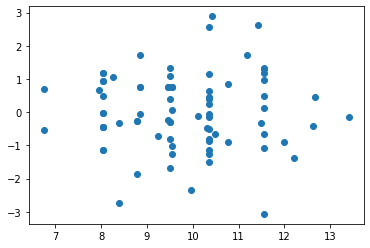

In [215]:
plt.scatter(model_bic_ols.predict(),model_bic_ols.resid)

In [216]:
np.mean(np.abs(model_bic_ols.resid))

0.8916259663705203

In [217]:
model_aic_ols = sr['Models'][np.argmin(sr['AICs'])].fit()

In [218]:
model_aic_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Fine   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     11.86
Date:                Wed, 22 Jun 2022   Prob (F-statistic):           1.38e-11
Time:                        14:18:42   Log-Likelihood:                -120.10
No. Observations:                  80   AIC:                             262.2
Df Residuals:                      69   BIC:                             288.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    6.6406      0.443     14.981      0.000       5.756       7.525
University_Student          -0.3739      0.226     -1.655      0.102      -0.825       0.077
Art_5                        0.4385      0.294      1.489      0.141      -0.149       1.026
Art_32                       1.4422      0.345      4.183      0.000       0.754       2.130
Art_13                       1.8896      0.461      4.100      0.000       0.970       2.809
Art_9                        1.3524      0.429      3.152      0.002       0.496       2.208
Region_Northern_Europe       1.8357      0.469      3.917      0.000       0.901       2.771
Region_Southern_Europe       1.1129      0.462      2.410      0.019       0.192       2.034
Region_Western_Europe        1.8389      0.614      2.994      0.004       0.614       3.064
Topic_Governmental_fines     1.5165      0.532      2.848      0.006       0.454       2.579
Topic_University             1.3295      0.379      3.505      0.001       0.573       2.086
==============================================================================
Omnibus:                        0.877   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.645   Jarque-Bera (JB):                0.395
Skew:                          -0.111   Prob(JB):                        0.821
Kurtosis:                       3.263   Cond. No.                         9.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

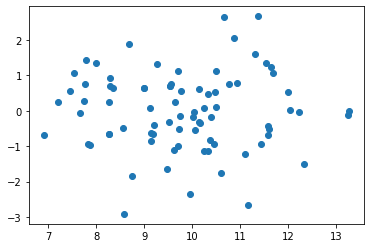

In [219]:
plt.scatter(model_aic_ols.predict(),model_aic_ols.resid)

(array([ 2.,  2.,  3., 14., 19., 13., 15.,  7.,  2.,  3.]),
 array([-3.06389468, -2.46872573, -1.87355678, -1.27838782, -0.68321887,
        -0.08804991,  0.50711904,  1.102288  ,  1.69745695,  2.29262591,
         2.88779486]),
 <BarContainer object of 10 artists>)

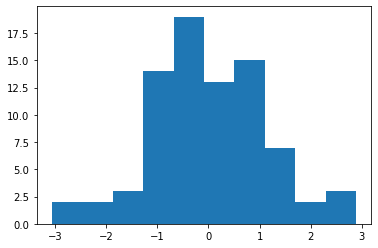

In [220]:
plt.hist(model_bic_ols.resid)

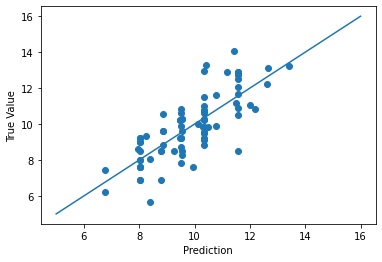

In [221]:
plt.scatter(model_bic_ols.predict(),model_bic_ols.predict() + model_bic_ols.resid)
plt.xlabel("Prediction")
plt.ylabel("True Value")
plt.plot([5,16],[5,16])

In [222]:
predtruedf = pd.DataFrame({"pred":np.exp(model_bic_ols.predict()),"true":np.exp(model_bic_ols.predict() - model_bic_ols.resid)})

In [223]:
chi2diff = ((predtruedf['pred']-predtruedf['true'])**2)/predtruedf['true']

In [224]:
[(data['Fine'],chi2diff)]

[(0      15000.0
  1      49200.0
  2     110000.0
  3       1000.0
  4       5000.0
          ...   
  81     13400.0
  82     10000.0
  83     50000.0
  84      2500.0
  85      2000.0
  Name: Fine, Length: 86, dtype: float64,
  0       4233.705160
  1       6369.039381
  2      35428.276600
  3       4497.126130
  4        462.128841
            ...      
  81     24443.415033
  82      1131.604462
  83    446470.471571
  84     47210.015299
  85       627.920207
  Length: 80, dtype: float64)]

## Validation

In [225]:
df_c_nooutlier = df_c.drop(np.argmax(df_c['Fine']),axis=0)

In [226]:
df_c_nooutlier_train = df_c_nooutlier.iloc[:55,:]
df_c_nooutlier_test = df_c_nooutlier.iloc[55:,:]

In [227]:
sr = stepwise_model_reduction(df_c_nooutlier_train.drop(['Fine'],axis=1),df_c_nooutlier_train['Fine'])
model_bic_ols = sr['Models'][np.argmin(sr['BICs'])].fit()

Best model:
                            OLS Regression Results                            
Dep. Variable:                   Fine   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     8.692
Date:                Wed, 22 Jun 2022   Prob (F-statistic):           1.56e-07
Time:                        14:18:47   Log-Likelihood:                -67.417
No. Observations:                  50   AIC:                             160.8
Df Residuals:                      37   BIC:                             185.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Interc

In [122]:
model_bic_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Fine   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     9.101
Date:                Wed, 22 Jun 2022   Prob (F-statistic):           2.51e-07
Time:                        14:04:27   Log-Likelihood:                -73.058
No. Observations:                  50   AIC:                             166.1
Df Residuals:                      40   BIC:                             185.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    7.6798      0.365     21.033      0.000       6.942       8.418
Art_32                       1.7879      0.424      4.212      0.000       0.930       2.646
Art_13                       2.8158      0.707      3.981      0.000       1.386       4.245
Art_12                      -1.9878      0.720     -2.761      0.009      -3.443      -0.533
Art_9                        2.0552      0.584      3.518      0.001       0.875       3.236
Art_35                      -1.6950      0.760     -2.230      0.031      -3.231      -0.159
Region_Northern_Europe       1.2246      0.410      2.986      0.005       0.396       2.053
Region_Western_Europe        1.1005      0.607      1.814      0.077      -0.126       2.326
Topic_Governmental_fines     1.6078      0.540      2.977      0.005       0.516       2.699
Topic_University             1.1060      0.438      2.523      0.016       0.220       1.992
==============================================================================
Omnibus:                        1.098   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.578   Jarque-Bera (JB):                0.927
Skew:                           0.326   Prob(JB):                        0.629
Kurtosis:                       2.862   Cond. No.                         7.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
y_hat = model_bic_ols.predict(df_c_nooutlier_train)
y = df_c_nooutlier_train['Fine']
np.mean(np.abs(y-y_hat))

0.8451656231039241

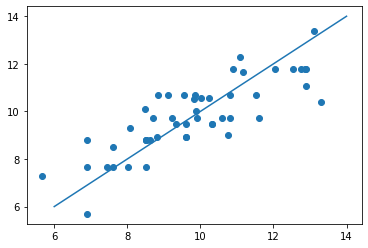

In [124]:
plt.scatter(y,y_hat)
plt.plot([6,14],[6,14])

In [125]:
y_hat = model_bic_ols.predict(df_c_nooutlier_test)
y = df_c_nooutlier_test['Fine']
np.mean(np.abs(y-y_hat))

1.1786876164803692

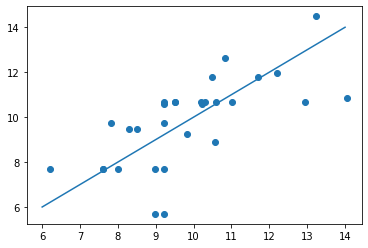

In [126]:
plt.scatter(y,y_hat)
plt.plot([6,14],[6,14])

In [127]:
sr = stepwise_model_reduction(df_c_nooutlier_train.drop(['Fine'],axis=1),df_c_nooutlier_train['Fine'])

Best model:
                            OLS Regression Results                            
Dep. Variable:                   Fine   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     8.692
Date:                Wed, 22 Jun 2022   Prob (F-statistic):           1.56e-07
Time:                        14:04:28   Log-Likelihood:                -67.417
No. Observations:                  50   AIC:                             160.8
Df Residuals:                      37   BIC:                             185.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Interc

In [128]:
sr['Models'][np.argmin(sr['BICs'])].fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Fine   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     9.101
Date:                Wed, 22 Jun 2022   Prob (F-statistic):           2.51e-07
Time:                        14:04:28   Log-Likelihood:                -73.058
No. Observations:                  50   AIC:                             166.1
Df Residuals:                      40   BIC:                             185.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    7.6798      0.365     21.033      0.000       6.942       8.418
Art_32                       1.7879      0.424      4.212      0.000       0.930       2.646
Art_13                       2.8158      0.707      3.981      0.000       1.386       4.245
Art_12                      -1.9878      0.720     -2.761      0.009      -3.443      -0.533
Art_9                        2.0552      0.584      3.518      0.001       0.875       3.236
Art_35                      -1.6950      0.760     -2.230      0.031      -3.231      -0.159
Region_Northern_Europe       1.2246      0.410      2.986      0.005       0.396       2.053
Region_Western_Europe        1.1005      0.607      1.814      0.077      -0.126       2.326
Topic_Governmental_fines     1.6078      0.540      2.977      0.005       0.516       2.699
Topic_University             1.1060      0.438      2.523      0.016       0.220       1.992
==============================================================================
Omnibus:                        1.098   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.578   Jarque-Bera (JB):                0.927
Skew:                           0.326   Prob(JB):                        0.629
Kurtosis:                       2.862   Cond. No.                         7.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

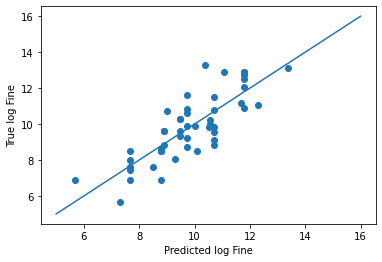

In [129]:
mod = sr['Models'][np.argmin(sr['BICs'])].fit()
plt.scatter(mod.predict(),mod.predict() + mod.resid)
plt.xlabel("Predicted log Fine")
plt.ylabel("True log Fine")
plt.plot([5,16],[5,16])

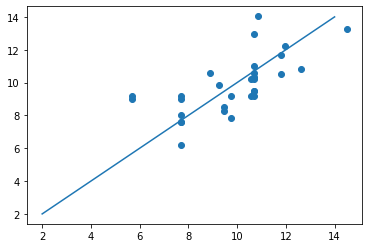

In [130]:
plt.scatter(mod.predict(df_c_nooutlier_test),df_c_nooutlier_test['Fine'])
plt.plot([2,14],[2,14])

In [131]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Fine   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     9.101
Date:                Wed, 22 Jun 2022   Prob (F-statistic):           2.51e-07
Time:                        14:04:28   Log-Likelihood:                -73.058
No. Observations:                  50   AIC:                             166.1
Df Residuals:                      40   BIC:                             185.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    7.6798      0.365     21.033      0.000       6.942       8.418
Art_32                       1.7879      0.424      4.212      0.000       0.930       2.646
Art_13                       2.8158      0.707      3.981      0.000       1.386       4.245
Art_12                      -1.9878      0.720     -2.761      0.009      -3.443      -0.533
Art_9                        2.0552      0.584      3.518      0.001       0.875       3.236
Art_35                      -1.6950      0.760     -2.230      0.031      -3.231      -0.159
Region_Northern_Europe       1.2246      0.410      2.986      0.005       0.396       2.053
Region_Western_Europe        1.1005      0.607      1.814      0.077      -0.126       2.326
Topic_Governmental_fines     1.6078      0.540      2.977      0.005       0.516       2.699
Topic_University             1.1060      0.438      2.523      0.016       0.220       1.992
==============================================================================
Omnibus:                        1.098   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.578   Jarque-Bera (JB):                0.927
Skew:                           0.326   Prob(JB):                        0.629
Kurtosis:                       2.862   Cond. No.                         7.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
np.mean(np.abs(mod.resid))

0.8451656231039241

In [133]:
np.mean(np.abs(np.exp(mod.predict())-np.exp(mod.predict() + mod.resid)))

55842.758039886474

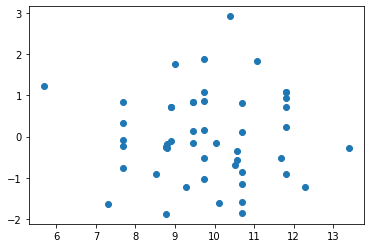

In [134]:
plt.scatter(mod.predict(),mod.resid)

## Error Interpretation Experiments

In [135]:
europrediction = np.exp(model_bic_ols.predict())

In [136]:
eurotrue = np.exp(model_bic_ols.predict() + model_bic_ols.resid)

In [137]:
preddf = pd.DataFrame({"pred":europrediction,"true":eurotrue,"diff":np.abs(model_bic_ols.resid)}).sort_values("diff")

In [138]:
np.mean(np.abs(preddf['pred'] - preddf['true']))

55842.75803988647

# Logistic Regression

In [275]:
def PandR(pred,true):
    TP = 0
    FP = 0
    FN = 0
    for i in range(len(pred)):
        if np.round(pred[i]) == 1:
            if true[i] == 1:
                TP += 1
            else:
                FP += 1
        else:
            if true[i] == 1:
                FN += 1
    print(TP,FP,FN)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    return (precision,recall)

In [247]:
df_c_logreg = df_c.dropna().copy()

In [248]:
np.exp(np.median(df_c_logreg['Fine'].dropna()))

15000.000000000004

In [249]:
df_c_logreg['Fine'] = df_c_logreg['Fine'] > np.median(df_c_logreg['Fine'].dropna())

In [250]:
classes = np.zeros(len(df_c_logreg['Fine']))
classes[df_c_logreg['Fine']] = 1
df_c_logreg['Fine'] = classes

In [251]:
df_c_logreg.to_csv("df_c_logreg.csv")

In [252]:
sr_logreg = stepwise_model_reduction(df_c_logreg.drop(['Fine'],axis=1),df_c_logreg['Fine'],smf.glm,sm.families.Binomial())

fitting glm
fitting glm
fitting glm
fitting glm
fitting glm
fitting glm
fitting glm
fitting glm
fitting glm
fitting glm
fitting glm
fitting glm
fitting glm
fitting glm
fitting glm
fitting glm
fitting glm
fitting glm
fitting glm
fitting glm
fitting glm
fitting glm
fitting glm
fitting glm
fitting glm
Intercept
Best model:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                   Fine   No. Observations:                   81
Model:                            GLM   Df Residuals:                       67
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19.978
Date:                Wed, 22 Jun 2022   Deviance:                       39.956
Time:                        14:19:28   Pearson chi2:                     57.5
No. Iterations:                     9         

In [253]:
def cox_snell(lln,llm,n):
    return 1 - (lln/llm)**(2/n)

In [254]:
nullmodel = smf.glm("Fine~1",data=df_c_logreg).fit()
nullmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Fine   No. Observations:                   81
Model:                            GLM   Df Residuals:                       80
Model Family:                Gaussian   Df Model:                            0
Link Function:               identity   Scale:                         0.25309
Method:                          IRLS   Log-Likelihood:                -58.783
Date:                Wed, 22 Jun 2022   Deviance:                       20.247
Time:                        14:19:34   Pearson chi2:                     20.2
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4938      0.056      8.835      0.000       0.384       0.603
==============================================================================
"""

In [256]:
logreg_model_old = smf.glm("Fine ~ Art_13 + Art_32 + University_Student + Topic_Employee_rights_violation + Topic_Family_data + Topic_Publishing",data=df_c_logreg,family = sm.families.Binomial())
logreg_model_old.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Fine   No. Observations:                   81
Model:                            GLM   Df Residuals:                       74
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34.625
Date:                Wed, 22 Jun 2022   Deviance:                       69.250
Time:                        14:19:40   Pearson chi2:                     88.7
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -0.5785      0.490     -1.180      0.238      -1.539       0.383
Art_13                              4.4909      1.493      3.008      0.003       1.565       7.417
Art_32                              2.3879      0.693      3.446      0.001       1.030       3.746
University_Student                 -1.4276      0.572     -2.495      0.013      -2.549      -0.306
Topic_Employee_rights_violation    -4.1642      1.632     -2.551      0.011      -7.364      -0.965
Topic_Family_data                  -3.1390      1.007     -3.117      0.002      -5.113      -1.165
Topic_Publishing                   -2.0426      0.984     -2.077      0.038      -3.970      -0.115
===================================================================================================
"""

In [257]:
logreg_model = sr_logreg['Models'][np.argmin(sr_logreg['BICs'])].fit()
logreg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Fine   No. Observations:                   81
Model:                            GLM   Df Residuals:                       74
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -31.557
Date:                Wed, 22 Jun 2022   Deviance:                       63.115
Time:                        14:19:43   Pearson chi2:                     89.4
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -2.7654      0.744     -3.718      0.000      -4.223      -1.308
Sensitive_Personal_Employee    -0.7844      0.353     -2.225      0.026      -1.475      -0.094
Art_32                          2.8234      0.817      3.456      0.001       1.222       4.424
Art_13                          3.3006      1.280      2.579      0.010       0.792       5.809
Art_9                           3.0381      1.065      2.854      0.004       0.952       5.125
Region_Northern_Europe          2.5183      0.848      2.968      0.003       0.856       4.181
Topic_Family_data              -2.6524      0.953     -2.782      0.005      -4.521      -0.784
===============================================================================================
"""

In [269]:
np.exp(logreg_model.params)

Intercept                       0.062949
Sensitive_Personal_Employee     0.456371
Art_32                         16.833482
Art_13                         27.129538
Art_9                          20.866077
Region_Northern_Europe         12.406890
Topic_Family_data               0.070483
dtype: float64

In [258]:
cox_snell(np.exp(-58.783),np.exp(-31.557),81)

0.4894398964216833

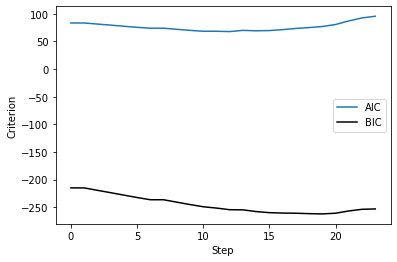

In [259]:
plt.plot(range(len(sr_logreg['AICs'])),sr_logreg['AICs'],label="AIC")
plt.plot(range(len(sr_logreg['BICs'])),sr_logreg['BICs'],color="black",label="BIC")
#plt.plot([26,26],[299,318],label="Optimum",linestyle="dashed")
plt.legend()
plt.xlabel("Step")
plt.ylabel("Criterion")
plt.savefig("AICBIC_logreg.png",dpi=400)
plt.show()

accuracy

In [260]:
1-np.sum(np.abs(np.round(logreg_model.predict())-df_c_logreg['Fine']))/81

0.8271604938271605

roc

In [152]:
from sklearn.metrics import roc_curve, auc
def ROC(pred,true,name):
    #models = ["Logistic Regression","Decision Tree"]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(true, pred[i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot([0, 1], [0, 1], "k--", lw=2)
    colors = ["red","blue"]
    class_ = ["Log Regression","Decision Tree"]
    for i, color in zip(range(2), colors):
        plt.plot(
            fpr[i],
            tpr[i],
            color=color,
            lw=2,
            label="ROC curve of {0} (area = {1:0.2f})".format(class_[i], roc_auc[i]),
        )
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    #plt.title("ROC curve for "+name)
    plt.legend(loc="lower right")
    plt.savefig("ROC_"+name+".png",dpi=600)
    plt.show()

In [276]:
PandR(logreg_model.predict(),df_c_logreg['Fine'])

35 9 5


(0.7954545454545454, 0.875)

## Decision Tree

In [264]:
df_c_logreg = pd.read_csv("df_c_logreg.csv")

In [265]:
from sklearn import tree
X = df_c_logreg.drop(['Fine'],axis=1)
Y = df_c_logreg['Fine']
print(Y)
clf = tree.DecisionTreeClassifier(min_samples_leaf=10)
clf = clf.fit(X, Y)

0     0.0
1     1.0
2     1.0
3     0.0
4     0.0
     ... 
76    0.0
77    0.0
78    1.0
79    0.0
80    0.0
Name: Fine, Length: 81, dtype: float64


In [266]:
1-np.sum(np.abs(clf.predict(X)-Y))/81

0.7530864197530864

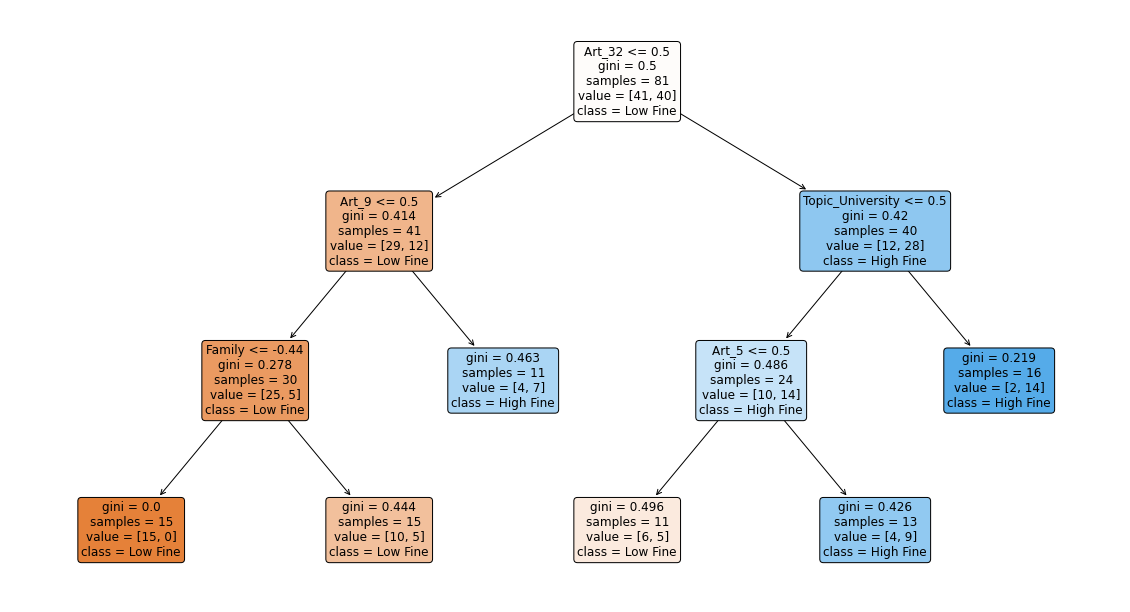

In [267]:
plt.figure(figsize=(20,11))
tree.plot_tree(clf,feature_names=X.columns,fontsize=12,class_names={0:"Low Fine",1:"High Fine"},filled=True,rounded=True)
plt.savefig("decision_tree.png")

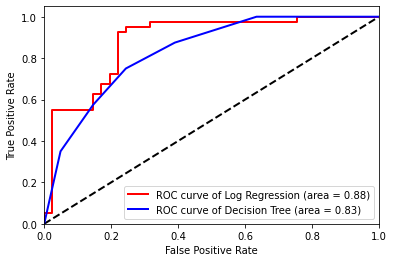

In [268]:
ROC([logreg_model.predict(),clf.predict_proba(X)[:,1]],df_c_logreg['Fine'],"ROC_combined")

In [279]:
PandR(clf.predict(X),df_c_logreg['Fine'])

30 10 10


(0.75, 0.75)

# Old stuff :)

In [270]:
lda_3_topics = lda_model

In [271]:
lda_model_4_topics = gensim.models.LdaMulticore(corpus_tfidf, num_topics=4, id2word=dictionary, passes=300, workers=14)
for idx, topic in lda_model_4_topics.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.066*"school" + 0.042*"municipal" + 0.038*"employee" + 0.038*"student" + 0.034*"city" + 0.031*"parent" + 0.028*"authority" + 0.028*"state" + 0.028*"processing" + 0.026*"computer"
Topic: 1 Word: 0.038*"fail" + 0.032*"email" + 0.028*"assessment" + 0.027*"public" + 0.027*"people" + 0.025*"result" + 0.024*"thing" + 0.024*"government" + 0.024*"implement" + 0.024*"process"
Topic: 2 Word: 0.057*"patient" + 0.037*"report" + 0.036*"mail" + 0.033*"notification" + 0.032*"incident" + 0.032*"receive" + 0.032*"parent" + 0.032*"send" + 0.030*"occur" + 0.027*"pursuant"
Topic: 3 Word: 0.057*"request" + 0.050*"publish" + 0.048*"basis" + 0.047*"legal" + 0.042*"surveillance" + 0.037*"complaint" + 0.035*"sufficient" + 0.033*"provide" + 0.033*"decision" + 0.032*"apply"


In [272]:
lda_model_6_topics = gensim.models.LdaMulticore(corpus_tfidf, num_topics=6, id2word=dictionary, passes=300, workers=14)
for idx, topic in lda_model_6_topics.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.062*"patient" + 0.055*"hospital" + 0.038*"purpose" + 0.028*"authority" + 0.028*"employee" + 0.025*"user" + 0.024*"report" + 0.023*"incident" + 0.022*"basis" + 0.021*"file"
Topic: 1 Word: 0.061*"school" + 0.048*"student" + 0.041*"process" + 0.035*"processing" + 0.031*"parent" + 0.029*"protect" + 0.028*"authority" + 0.026*"manner" + 0.025*"regard" + 0.024*"summary"
Topic: 2 Word: 0.046*"fail" + 0.040*"assessment" + 0.040*"principle" + 0.032*"processing" + 0.032*"implement" + 0.032*"email" + 0.031*"file" + 0.030*"organizational" + 0.028*"municipal" + 0.028*"child"
Topic: 3 Word: 0.052*"request" + 0.048*"student" + 0.047*"public" + 0.040*"place" + 0.037*"provide" + 0.033*"surveillance" + 0.029*"legal" + 0.028*"sufficient" + 0.028*"basis" + 0.024*"municipal"
Topic: 4 Word: 0.054*"city" + 0.039*"employee" + 0.038*"government" + 0.034*"register" + 0.033*"computer" + 0.031*"investigation" + 0.030*"include" + 0.029*"conclude" + 0.028*"number" + 0.027*"violate"
Topic: 5 Word: 0.

In [273]:
lda_model_2_topics = gensim.models.LdaMulticore(corpus_tfidf, num_topics=2, id2word=dictionary, passes=300, workers=14)
for idx, topic in lda_model_2_topics.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.032*"patient" + 0.032*"student" + 0.028*"school" + 0.028*"parent" + 0.027*"processing" + 0.024*"report" + 0.022*"authority" + 0.021*"hospital" + 0.019*"request" + 0.019*"provide"
Topic: 1 Word: 0.033*"public" + 0.029*"employee" + 0.026*"file" + 0.026*"municipal" + 0.024*"city" + 0.024*"publish" + 0.023*"email" + 0.023*"legal" + 0.023*"basis" + 0.023*"government"


In [142]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(tfidf_selection)

D:\Anaconda\lib\site-packages\factor_analyzer\utils.py:249: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


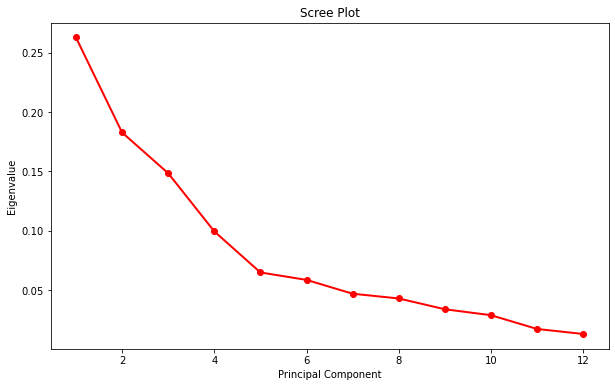

In [126]:
N=np.array(tfidf_selection)
N=np.matrix(N.T)*np.matrix(N)
A,B,C=np.linalg.svd(N)
eigen_values=B*2/np.sum(B*2)
figure=plt.figure(figsize=(10,6))
sing_vals=np.arange(len(eigen_values)) + 1
plt.plot(sing_vals,eigen_values, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue') 
plt.show()

In [419]:
reports_str = " ".join(reports)

In [420]:
reports_str = reports_str.replace('.','')
reports_str = reports_str.replace(',','')

In [421]:
reports_str

"During the data synchronization of the Population Information System of the Municipal Administration with the databases of the State Centre for Business Registers the personal data of an applicant for the fostering of an adopted child was replaced due to an error with the personal data of the biological parents which were subsequently accessible in the Population Register of the Republic of Lithuania This constituted a violation of the principles of integrity and confidentiality of personal data processing (Art 5 (1) f) GDPR) and a violation of the principle of accuracy  The Norwegian DPA (Datatilsynet) has fined the municipality of Moss EUR 49200 for inadequately securing personal data In January the municipality of Rygge was annexed to the municipality of Moss For this reason several IT systems from both municipalities were combined Due to inadequate security measures a data breach occurred in a productive system used in the municipality's health service This system processed person

In [422]:
tokens = reports_str.split()

In [423]:
#tokens = nltk.word_tokenize(reports_str)

In [424]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [425]:
tokens_no_punctuation = [token.lower() for token in tokens if token not in string.punctuation]

In [426]:
tokens_no_punctuation

['during',
 'the',
 'data',
 'synchronization',
 'of',
 'the',
 'population',
 'information',
 'system',
 'of',
 'the',
 'municipal',
 'administration',
 'with',
 'the',
 'databases',
 'of',
 'the',
 'state',
 'centre',
 'for',
 'business',
 'registers',
 'the',
 'personal',
 'data',
 'of',
 'an',
 'applicant',
 'for',
 'the',
 'fostering',
 'of',
 'an',
 'adopted',
 'child',
 'was',
 'replaced',
 'due',
 'to',
 'an',
 'error',
 'with',
 'the',
 'personal',
 'data',
 'of',
 'the',
 'biological',
 'parents',
 'which',
 'were',
 'subsequently',
 'accessible',
 'in',
 'the',
 'population',
 'register',
 'of',
 'the',
 'republic',
 'of',
 'lithuania',
 'this',
 'constituted',
 'a',
 'violation',
 'of',
 'the',
 'principles',
 'of',
 'integrity',
 'and',
 'confidentiality',
 'of',
 'personal',
 'data',
 'processing',
 '(art',
 '5',
 '(1)',
 'f)',
 'gdpr)',
 'and',
 'a',
 'violation',
 'of',
 'the',
 'principle',
 'of',
 'accuracy',
 'the',
 'norwegian',
 'dpa',
 '(datatilsynet)',
 'has',
 '

In [427]:
from collections import Counter

In [428]:
stopwords = ["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"]
stopwords.append('eur')


tokens_after_preprocess = []
for word in tokens_no_punctuation:
    try:
        float(word)
    except:
        if word in stopwords:
            pass
        else:
            tokens_after_preprocess.append(word)

In [429]:
stopwords = ["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"]

In [430]:
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word,pos=('a')) for word in tokens_after_preprocess]  
#print("The lemmatized words using a POS tag: ", lemmatized_words) 

In [431]:
lemmatized_words = [re.sub(r"[0-9]","",word) for word in lemmatized_words]

In [432]:
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(lemmatized_words)

In [433]:
tf_idf_df = pd.DataFrame({'idf' : vectorizer.idf_,'word':vectorizer.get_feature_names()})

In [434]:
tf_idf_df.sort_values("idf",ignore_index=True,inplace=True)

In [435]:
lemmatized_words_selection = tf_idf_df

In [436]:
lemmatized_words_selection

idf          word
0     3.790111          data
1     4.514030           dpa
2     4.801712      personal
3     4.873685  municipality
4     5.271716          gdpr
...        ...           ...
1024  8.385231        images
1025  8.385231      imposing
1026  8.385231  inadequately
1027  8.385231          held
1028  8.385231         østre

[1029 rows x 2 columns]

In [437]:
frequency_distribution = nltk.FreqDist(lemmatized_words)
freq_dist_common = frequency_distribution.most_common(15)
freq_dist_common = freq_dist_common[1:15]
freq_dist_common

[('dpa', 92),
 ('personal', 71),
 ('municipality', 52),
 ('gdpr', 41),
 ('fine', 40),
 ('art', 38),
 ('access', 37),
 ('controller', 33),
 ('protection', 28),
 ('processing', 27),
 ('breach', 27),
 ('health', 27),
 ('imposed', 26),
 ('university', 26)]

In [438]:
frequency_distribution.most_common(30)

[('data', 195),
 ('dpa', 92),
 ('personal', 71),
 ('municipality', 52),
 ('gdpr', 41),
 ('fine', 40),
 ('art', 38),
 ('access', 37),
 ('controller', 33),
 ('protection', 28),
 ('processing', 27),
 ('breach', 27),
 ('health', 27),
 ('imposed', 26),
 ('university', 26),
 ('measures', 24),
 ('students', 24),
 ('security', 21),
 ('authority', 19),
 ('contained', 19),
 ('fined', 18),
 ('patient', 18),
 ('technical', 18),
 ('school', 17),
 ('parents', 16),
 ('violation', 16),
 ('()', 16),
 ('subjects', 16),
 ('failed', 16),
 ('addition', 16)]

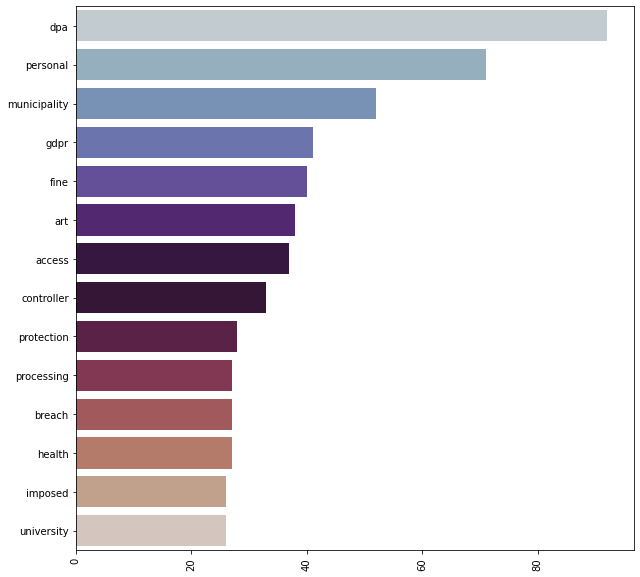

In [439]:
all_fdist = pd.Series(dict(freq_dist_common)) # convert to a pandas series for easier visualization.
fig, ax = plt.subplots(figsize=(10,10))
sns.set_palette("dark")
all_plot = sns.barplot(x=all_fdist.values, y=all_fdist.index, ax=ax,palette = 'twilight' ) # use seaborn. 
plt.xticks(rotation=90);

In [440]:
features = [key_value_pair[0] for key_value_pair in freq_dist_common]
features.append('students')
features.append('parents')
features.append('patient')
features.append('security')
features = np.sort(features)
features

array(['access', 'art', 'breach', 'controller', 'dpa', 'fine', 'gdpr',
       'health', 'imposed', 'municipality', 'parents', 'patient',
       'personal', 'processing', 'protection', 'security', 'students',
       'university'], dtype='<U12')

In [441]:
def binary_search(elm,ary,carryid):
    index = int(np.ceil(len(ary)/2))
    if len(ary) == 1:
        if elm == ary[0]:
            return carryid
        else: 
            return None
    if elm == ary[index]:
        return carryid + index
    elif elm < ary[index]:
        return binary_search(elm,ary[:index],carryid)
    else:
        return binary_search(elm,ary[index:],carryid+index)

In [442]:
def lem(word,pos):
    return lemmatizer.lemmatize(word,pos=pos)

In [443]:
def input_array(sentence,all_words):
    sentence = sentence.replace('.','')
    sentence = sentence.replace(',','')
    sentence = sentence.lower()
    words = list(set(nltk.word_tokenize(sentence)))
    N = len(all_words)
    array = np.zeros(N)
    for word in words:
        value = 1
        bsd = binary_search(word,all_words,0)
        if bsd is not None:
            array[bsd] = value
        else:
            bsv = binary_search(lem(word,'v'),all_words,0)
            if bsv is not None:
                array[bsv] = value
            else:
                bsa = binary_search(lem(word,'a'),all_words,0)
                if bsa is not None:
                    array[bsa] = value
                else:
                    bsn = binary_search(lem(word,'n'),all_words,0)
                    if bsn is not None:
                        array[bsn] = value

    return array

In [444]:
feature_matrix = [input_array(sent,features) for sent in reports]
feature_matrix[5]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0.])

In [445]:
print(features)

['access' 'art' 'breach' 'controller' 'dpa' 'fine' 'gdpr' 'health'
 'imposed' 'municipality' 'parents' 'patient' 'personal' 'processing'
 'protection' 'security' 'students' 'university']


In [446]:
pd.DataFrame(feature_matrix,columns=features)

access  art  breach  controller  dpa  fine  gdpr  health  imposed  \
0      0.0  1.0     0.0         0.0  0.0   0.0   1.0     0.0      0.0   
1      1.0  0.0     1.0         0.0  1.0   0.0   0.0     1.0      0.0   
2      1.0  1.0     0.0         1.0  1.0   1.0   1.0     0.0      0.0   
3      0.0  0.0     0.0         0.0  1.0   1.0   0.0     0.0      1.0   
4      0.0  0.0     0.0         0.0  0.0   1.0   0.0     0.0      0.0   
..     ...  ...     ...         ...  ...   ...   ...     ...      ...   
67     0.0  0.0     0.0         0.0  1.0   0.0   0.0     1.0      0.0   
68     1.0  1.0     1.0         0.0  1.0   0.0   1.0     0.0      0.0   
69     1.0  1.0     1.0         0.0  1.0   0.0   1.0     0.0      0.0   
70     1.0  1.0     1.0         0.0  1.0   1.0   1.0     0.0      1.0   
71     0.0  0.0     0.0         0.0  1.0   1.0   0.0     0.0      1.0   

    municipality  parents  patient  personal  processing  protection  \
0            0.0      1.0      0.0       1.0         1.0         0.0   
1            1.0      0.0      1.0       1.0         0.0         0.0   
2            0.0      0.0      0.0       1.0         1.0         1.0   
3            0.0      0.0      0.0       1.0         0.0         0.0   
4            0.0      0.0      0.0       0.0         0.0         0.0   
..           ...      ...      ...       ...         ...         ...   
67           1.0      0.0      0.0       1.0         0.0         0.0   
68           1.0      1.0      0.0       0.0         0.0         1.0   
69           0.0      0.0      0.0       1.0         0.0         0.0   
70           0.0      0.0      0.0       1.0         0.0         1.0   
71           1.0      0.0      0.0       1.0         1.0         1.0   

    security  students  university  
0        0.0       0.0         0.0  
1        1.0       0.0         0.0  
2        0.0       0.0         0.0  
3        0.0       0.0         1.0  
4        0.0       0.0         0.0  
..       ...       ...         ...  
67       1.0       0.0         0.0  
68       1.0       0.0         0.0  
69       1.0       1.0         1.0  
70       0.0       0.0         0.0  
71       0.0       0.0         0.0  

[72 rows x 18 columns]

In [447]:
reports[69]

"The Polish DPA (UODO) has fined Warsaw University of Technology EUR 10,000. The university had reported a data breach to the authority pursuant to Art. 33 GDPR. One of the university's organizational units used an application created by university staff to register for courses and access teaching history, assessment of exam results and billing of fees. In early January 2020, an unauthorized person had downloaded a database from the application that contained personal data of students and faculty (over 5,000 individuals). In its investigation, the DPA found that the Unvierstät had failed to implement appropriate technical and organizational measures that ensured the security of personal data . The DPA also found that the university had not conducted a formal risk assessment. "

In [448]:
pca = PCA(4)
pca.fit_transform(feature_matrix)

array([[-0.37554986,  0.52935452,  1.30831181,  0.65369186],
       [-0.20184323,  1.05849356, -1.18376785, -0.99897564],
       [ 0.74570399,  0.20711713,  0.83480974, -0.068281  ],
       [ 0.23870868, -0.98482038, -0.0133746 ,  0.05507523],
       [-0.41979918, -0.53343439,  0.09480606,  0.50216219],
       [-0.9389495 , -0.04763595,  0.63047531, -0.40244794],
       [-0.16200738,  0.55525455,  0.21226396, -0.93600131],
       [-0.35538562, -0.1815552 , -0.11160706,  0.30296989],
       [ 0.31627168, -0.50587535,  0.37863119,  0.41541515],
       [-1.09712604,  0.13818804,  0.09364221, -0.04694009],
       [-1.08423639, -0.20568224,  0.39834418,  0.00660064],
       [-0.23915759,  0.48147688,  0.61863308,  1.51247003],
       [ 1.32190835, -0.07547678,  0.2433914 ,  0.54302642],
       [-1.0198189 ,  0.072363  ,  0.46613683, -0.00248552],
       [-1.08423639, -0.20568224,  0.39834418,  0.00660064],
       [-0.90260294, -0.28263231, -0.03655493,  0.45438005],
       [-0.29024584,  0.

In [449]:
pd.DataFrame(pca.components_,columns=features).transpose()

0         1         2         3
access       -0.018052  0.337173 -0.241879  0.096888
art           0.281554  0.341655  0.233197  0.284151
breach        0.190902  0.445748 -0.248399 -0.139350
controller    0.113612 -0.300666 -0.149763 -0.108863
dpa           0.434345 -0.153646 -0.379111 -0.112740
fine          0.482804 -0.250802  0.131361  0.047782
gdpr          0.307921  0.340167  0.300858  0.232923
health        0.065450  0.022314 -0.145859 -0.357495
imposed       0.468618 -0.231349  0.032696  0.000464
municipality  0.249269  0.161131 -0.039055 -0.363934
parents       0.036741  0.112343  0.066241  0.235991
patient      -0.026631  0.107585 -0.223107 -0.075404
personal     -0.181633  0.076950  0.434899 -0.447779
processing    0.082470 -0.059128  0.309672 -0.105974
protection    0.145287  0.158046  0.232131 -0.409049
security     -0.012890  0.343870 -0.304702 -0.053541
students      0.037228 -0.030056  0.054892  0.305025
university   -0.062821 -0.143340 -0.196665  0.112968

In [450]:
np.argmax(pca.components_)

5

In [451]:
pca.score(feature_matrix)

-9.105297935667018

C:\Users\alex\AppData\Local\Temp/ipykernel_3828/420728405.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list(features), rotation=90)
C:\Users\alex\AppData\Local\Temp/ipykernel_3828/420728405.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(list(features))


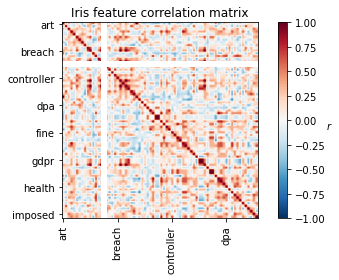

In [488]:
ax = plt.axes()

im = ax.imshow(np.corrcoef(feature_matrix), cmap="RdBu_r", vmin=-1, vmax=1)

ax.set_xticklabels(list(features), rotation=90)
ax.set_yticklabels(list(features))

plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
ax.set_title("Iris feature correlation matrix")
plt.tight_layout()

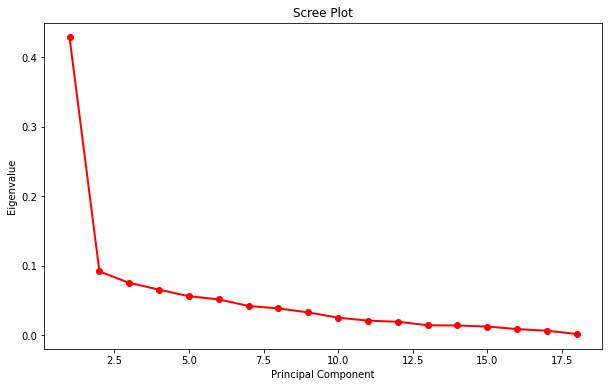

In [453]:
N=np.array(feature_matrix)
N=np.matrix(N.T)*np.matrix(N)
A,B,C=np.linalg.svd(N)
eigen_values=B*2/np.sum(B*2)
figure=plt.figure(figsize=(10,6))
sing_vals=np.arange(len(eigen_values)) + 1
plt.plot(sing_vals,eigen_values, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue') 
plt.show()



 PCA :

[[-1.80520840e-02  3.37173304e-01 -2.41879271e-01  9.68880440e-02]
 [ 2.81554254e-01  3.41655265e-01  2.33197133e-01  2.84151199e-01]
 [ 1.90902189e-01  4.45748423e-01 -2.48399184e-01 -1.39350188e-01]
 [ 1.13612145e-01 -3.00666054e-01 -1.49763300e-01 -1.08863166e-01]
 [ 4.34344567e-01 -1.53646200e-01 -3.79110922e-01 -1.12740058e-01]
 [ 4.82803766e-01 -2.50802081e-01  1.31360994e-01  4.77821354e-02]
 [ 3.07921265e-01  3.40166906e-01  3.00857880e-01  2.32922978e-01]
 [ 6.54500875e-02  2.23140059e-02 -1.45858793e-01 -3.57494757e-01]
 [ 4.68617973e-01 -2.31349439e-01  3.26961218e-02  4.64288078e-04]
 [ 2.49269468e-01  1.61131081e-01 -3.90548744e-02 -3.63934176e-01]
 [ 3.67414355e-02  1.12342660e-01  6.62406931e-02  2.35991247e-01]
 [-2.66314133e-02  1.07584908e-01 -2.23107016e-01 -7.54044111e-02]
 [-1.81633444e-01  7.69500668e-02  4.34899118e-01 -4.47779413e-01]
 [ 8.24695723e-02 -5.91280670e-02  3.09671916e-01 -1.05974201e-01]
 [ 1.45286886e-01  1.58046296e-01  2.32131130e-01 -4

C:\Users\alex\AppData\Local\Temp/ipykernel_3828/3661617706.py:21: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\alex\AppData\Local\Temp/ipykernel_3828/3661617706.py:21: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\alex\AppData\Local\Temp/ipykernel_3828/3661617706.py:21: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


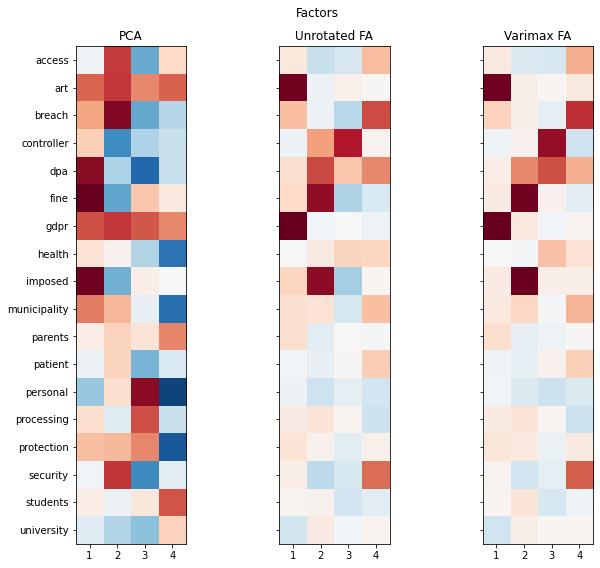

In [454]:
n_comps = 4

methods = [
    ("PCA", PCA()),
    ("Unrotated FA", FactorAnalysis()),
    ("Varimax FA", FactorAnalysis(rotation="varimax")),
]
fig, axes = plt.subplots(ncols=len(methods), figsize=(10, 8))

for ax, (method, fa) in zip(axes, methods):
    fa.set_params(n_components=n_comps)
    fa.fit(feature_matrix)

    components = fa.components_.T
    print("\n\n %s :\n" % method)
    print(components)

    vmax = np.abs(components).max()
    ax.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax)
    ax.set_yticks(np.arange(len(features)))
    if ax.is_first_col():
        ax.set_yticklabels(features)
    else:
        ax.set_yticklabels([])
    ax.set_title(str(method))
    ax.set_xticks([0, 1,2,3])
    ax.set_xticklabels(["1", "2","3","4"])
fig.suptitle("Factors")
plt.tight_layout()
plt.show()

In [455]:
factor_names = ['Legal_Process','Offence','Privacy_Breach','Sensitive_Breach']

### bigrams

In [456]:
def input_array_bigram(sentence,all_words):
    sentence = sentence.replace('.','')
    sentence = sentence.replace(',','')
    words = list(set(nltk.bigrams(sentence.split())))
    words = [(word[0].lower(),word[1].lower()) for word in words if word[0].lower() not in stopwords and word[1].lower() not in stopwords]
    N = len(all_words)
    array = np.zeros(N)

    for word_ in words:
        word = "_".join(word_)
        print(word)
        bsd = binary_search(word,all_words,0)
        if bsd is not None:
            array[bsd] = 1

    return array

In [457]:
wrds_bi = list()
wrd_tok = list(nltk.bigrams(lemmatized_words))
for w in wrd_tok:
    wrds_bi.append("_".join(w))
c = Counter(wrds_bi)
wrds_bi_ = list()
for w in wrds_bi:
    if c[w] > 5:
        wrds_bi_.append(w)
wrds_bi_.sort()
wrds_bi = np.array(list(set(wrds_bi_)))

In [458]:
wrds_bi

array(['italian_dpa', 'art_()', 'dpa_considered', 'adequate_technical',
       'health_data', 'measures_ensure', 'data_processed',
       'data_subjects', 'personal_data', 'data_subject',
       'data_processing', 'imposed_fine', 'norwegian_dpa',
       'dpa_(datatilsynet)', 'technical_organizational', 'legal_basis',
       'gdpr_art', 'protection_authority', 'violation_art',
       'processing_personal', 'pursuant_art', 'art_gdpr', 'dpa_imposed',
       'data_protection', 'organizational_measures', 'data_breach',
       'patient_data'], dtype='<U24')

In [459]:
frequency_distribution = nltk.FreqDist(wrd_tok)
freq_dist_common = frequency_distribution.most_common(15)
freq_dist_common

[(('personal', 'data'), 62),
 (('art', 'gdpr'), 25),
 (('imposed', 'fine'), 23),
 (('data', 'breach'), 20),
 (('data', 'protection'), 18),
 (('data', 'subjects'), 16),
 (('technical', 'organizational'), 14),
 (('health', 'data'), 13),
 (('art', '()'), 13),
 (('organizational', 'measures'), 13),
 (('data', 'subject'), 12),
 (('protection', 'authority'), 10),
 (('norwegian', 'dpa'), 9),
 (('italian', 'dpa'), 9),
 (('dpa', 'imposed'), 9)]

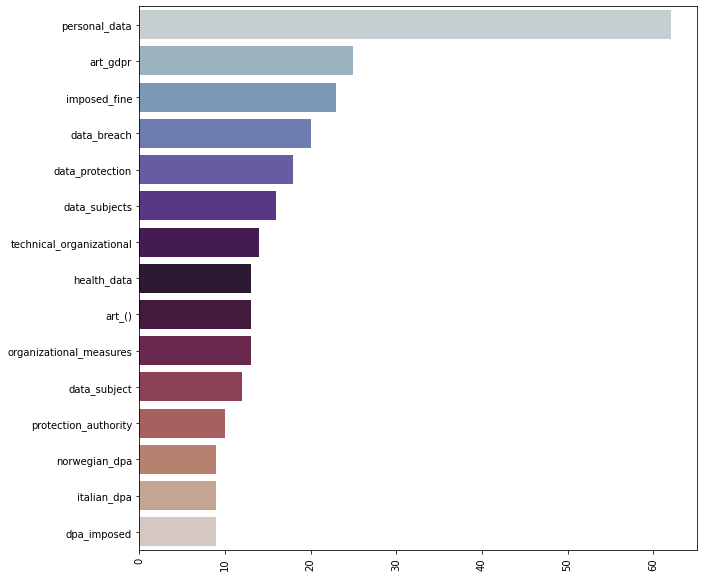

In [460]:
all_fdist = pd.Series(dict(freq_dist_common)) # convert to a pandas series for easier visualization.
fig, ax = plt.subplots(figsize=(10,10))
sns.set_palette("dark")
all_plot = sns.barplot(x=all_fdist.values, y=['_'.join(element[0]) for element in freq_dist_common], ax=ax,palette = 'twilight' ) # use seaborn. 
plt.xticks(rotation=90);

In [461]:
features_bigrams = ['_'.join(element[0]) for element in freq_dist_common]

In [462]:
feature_matrix_bigrams = [input_array_bigram(sent,features_bigrams) for sent in reports]

biological_parents
business_registers
data_processing
processing_(art
personal_data
data_synchronization
subsequently_accessible
adopted_child
state_centre
5_(1)
(art_5
population_register
(1)_f)
municipal_administration
f)_gdpr)
inadequate_security
breach_occurred
2000_people
health_service
pregnant_women
security_measures
processed_personal
mother's_drug
dpa_(datatilsynet)
immunization_programs
securing_personal
wrong_vaccines
breach_errors
service_ward
personal_data
immunization_data
data_subjects
moss_eur
national_immunization
health_center
municipality's_health
women_including
vaccine_registration
inadequately_securing
eur_49200
data_breach
norwegian_dpa
errors_occurred
immunization_registry
health_workers
health_data
health_checks
irish_dpa
accessible_manner
council_failed
traffic_cameras
monitor_individuals
15_gdpr
gdpr_violations
traffic_management
fined_limerick
plain_language
13_gdpr
protection_officer
council's_website
automatic_license
plate_recognition
personal_data
dpa_co

In [463]:
df = pd.DataFrame(feature_matrix_bigrams,columns=features_bigrams)

In [464]:
for i in range(15):
    print(np.sum(df.iloc[:,i]))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
8.0
0.0
8.0
0.0
0.0




 PCA :

[[ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
 [-0.00000000e+00 -0.00000000e+00 -9.98962001e-01  4.55512861e-02]
 [ 2.46519033e-32 -2.22044605e-16 -4.55512861e-02 -9.98962001e-01]
 [-0.00000000e+00 -0.00000000e+00  2.22044605e-16  2.12677098e-15]
 [-1.53951247e-48  3.08148791e-33 -0.00000000e+00  2.22044605e-16]
 [ 9.72346137e-63  5.47382213e-48 -0.00000000e+00 -0.00000000e+00]
 [-4.55787252e-64  8.55284707e-49  8.21073319e-48 -1.31371731e-46]
 [ 4.04820401e-79 -0.00000000e+00 -4.86173069e-63 -0.00000000e+00]
 [ 6.74700668e-80  9.49556775e-65  3.03858168e-64  9.72346137e-63]
 [-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
 [ 7.07106781e-01 -7.07106781e-01 -0.00000000e+00 -2.77555756e-17]
 [-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
 [ 7.07106781e-01  7.07106781e-01 -2.22044605e-16  2.77555756e-17]
 [ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
 [ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0

C:\Users\alex\AppData\Local\Temp/ipykernel_3828/554979486.py:21: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\alex\AppData\Local\Temp/ipykernel_3828/554979486.py:21: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\alex\AppData\Local\Temp/ipykernel_3828/554979486.py:21: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


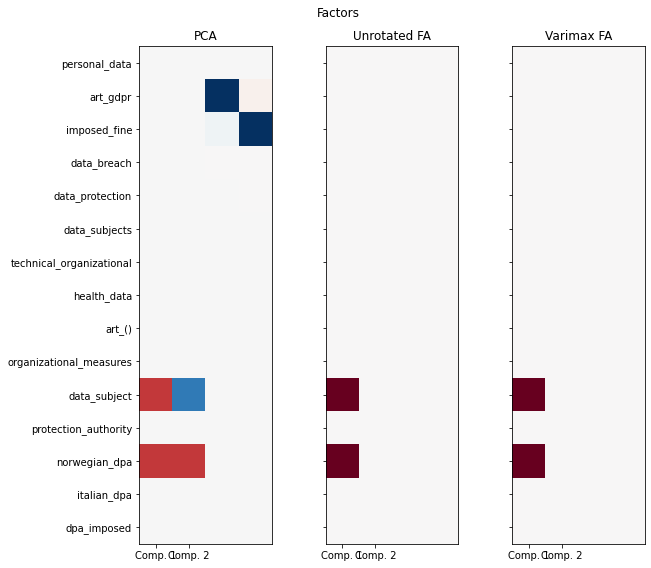

In [465]:
n_comps = 4

methods = [
    ("PCA", PCA()),
    ("Unrotated FA", FactorAnalysis()),
    ("Varimax FA", FactorAnalysis(rotation="varimax")),
]
fig, axes = plt.subplots(ncols=len(methods), figsize=(10, 8))

for ax, (method, fa) in zip(axes, methods):
    fa.set_params(n_components=n_comps)
    fa.fit(feature_matrix_bigrams)

    components = fa.components_.T
    print("\n\n %s :\n" % method)
    print(components)

    vmax = np.abs(components).max()
    ax.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax)
    ax.set_yticks(np.arange(len(features_bigrams)))
    if ax.is_first_col():
        ax.set_yticklabels(features_bigrams)
    else:
        ax.set_yticklabels([])
    ax.set_title(str(method))
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Comp. 1", "Comp. 2"])
fig.suptitle("Factors")
plt.tight_layout()
plt.show()

# model build

In [466]:
print(pca.components_.shape)

(4, 18)


In [467]:
np.array(feature_matrix).shape

(72, 18)

In [297]:
scores = np.matmul(np.array(feature_matrix) , pca.components_.T)
scores_df = pd.DataFrame(scores,columns=factor_names)

NameError: name 'feature_matrix' is not defined

In [469]:
model_df = scores_df
model_df['Fine'] = data['Fine']
model_df['Sensitive_Breach'] = -model_df['Sensitive_Breach']

In [470]:
model_df.columns

Index(['Legal_Process', 'Offence', 'Privacy_Breach', 'Sensitive_Breach',
       'Fine'],
      dtype='object')

In [471]:
model_df = model_df.dropna(0)

C:\Users\alex\AppData\Local\Temp/ipykernel_3828/1355088637.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  model_df = model_df.dropna(0)


In [472]:
model_df['Fine'] = np.log(model_df['Fine']+0.00001)

C:\Users\alex\AppData\Local\Temp/ipykernel_3828/1282166333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['Fine'] = np.log(model_df['Fine']+0.00001)


In [473]:
model_df['Region'] = data['Region']

C:\Users\alex\AppData\Local\Temp/ipykernel_3828/1914448472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['Region'] = data['Region']


In [296]:
model = smf.ols(formula = 'Fine~Legal_Process+Offence+Privacy_Breach+Sensitive_Breach+Region',data=model_df)

NameError: name 'model_df' is not defined

In [475]:
model_df['Region'].value_counts()

Northern Europe    30
Southern Europe    22
Central Europe      6
Western Europe      5
Eastern Europe      4
Name: Region, dtype: int64

In [476]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Fine   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     2.701
Date:                Thu, 19 May 2022   Prob (F-statistic):             0.0134
Time:                        20:32:23   Log-Likelihood:                -124.74
No. Observations:                  67   AIC:                             267.5
Df Residuals:                      58   BIC:                             287.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     8.0556      0.755     10.667      0.000       6.544       9.567
Region[T.Eastern Europe]     -0.0707      1.138     -0.062      0.951      -2.349       2.208
Region[T.Northern Europe]     1.8415      0.814      2.262      0.027       0.212       3.471
Region[T.Southern Europe]     1.0622      0.790      1.345      0.184      -0.519       2.643
Region[T.Western Europe]      1.2972      1.062      1.221      0.227      -0.829       3.423
Legal_Process                 0.0784      0.285      0.275      0.784      -0.492       0.649
Offence                       0.3489      0.318      1.098      0.277      -0.287       0.985
Privacy_Breach               -0.4553      0.349     -1.305      0.197      -1.154       0.243
Sensitive_Breach              0.8725      0.381      2.289      0.026       0.110       1.635
==============================================================================
Omnibus:                        2.446   Durbin-Watson:                   1.706
Prob(Omnibus):                  0.294   Jarque-Bera (JB):                2.357
Skew:                           0.442   Prob(JB):                        0.308
Kurtosis:                       2.750   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(array([6., 2., 4., 2., 5., 5., 6., 6., 6., 5., 5., 4., 1., 3., 1., 0., 3.,
        1., 1., 1.]),
 array([-2.59817771, -2.26784683, -1.93751595, -1.60718507, -1.27685419,
        -0.9465233 , -0.61619242, -0.28586154,  0.04446934,  0.37480022,
         0.70513111,  1.03546199,  1.36579287,  1.69612375,  2.02645463,
         2.35678552,  2.6871164 ,  3.01744728,  3.34777816,  3.67810904,
         4.00843992]),
 <BarContainer object of 20 artists>)

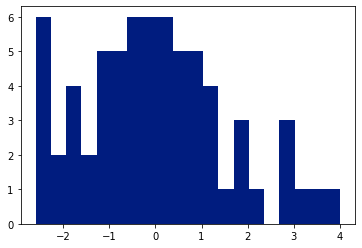

In [477]:
plt.hist(model.fit().resid,bins=20)

In [478]:
model.fit().predict

<bound method Results.predict of <statsmodels.regression.linear_model.OLSResults object at 0x000002A7A06546D0>>

In [479]:
MAE = np.mean(np.abs(model.fit().resid))
MAE

1.2498608416259052

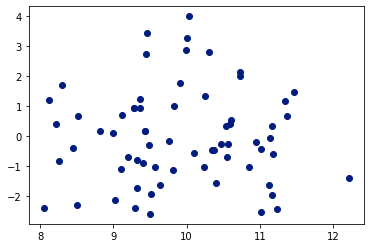

In [480]:
plt.scatter(y=model.fit().resid , x =model.fit().predict()) # skedasitcity check

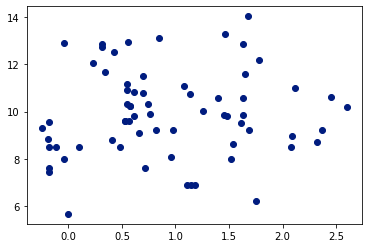

In [481]:
plt.scatter(y=model_df['Fine'],x=model_df.iloc[:,0])

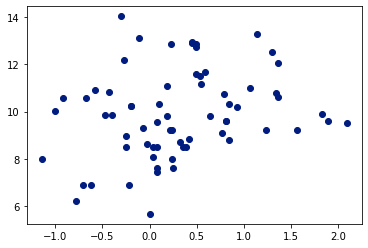

In [482]:
plt.scatter(y=model_df['Fine'],x=model_df.iloc[:,1])

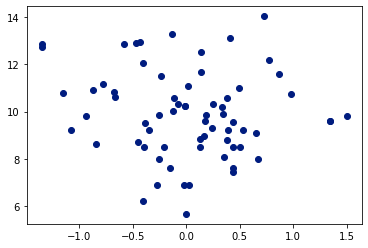

In [483]:
plt.scatter(y=model_df['Fine'],x=model_df.iloc[:,2])

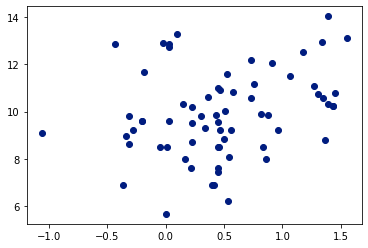

In [484]:
plt.scatter(y=model_df['Fine'],x=model_df.iloc[:,3])

In [485]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [489]:
X = add_constant(model_df)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1]-1)], 
              index=X.columns)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''